To run: Right-click ACM_data folder in main drive folder and click create shortcut. Then you will be able to run all cells.

In [148]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import urllib
from urllib import request as ulreq
from io import StringIO
from PIL import Image, ImageFile
countries = ['bangladesh',
 'ethiopia',
 'ghana',
 'india',
 'kenya',
 'nigeria',
 'pakistan',
 'uganda',
 'yemen']
all_countries=countries + ['australia',
                           'canada',
 'france',
 'italy',
 'japan',
 'new zealand',
 'spain',
 'uk',
 'usa']
import sys
print(sys.version)
all_countries

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


['bangladesh',
 'ethiopia',
 'ghana',
 'india',
 'kenya',
 'nigeria',
 'pakistan',
 'uganda',
 'yemen',
 'australia',
 'canada',
 'france',
 'italy',
 'japan',
 'new zealand',
 'spain',
 'uk',
 'usa']

In [149]:
!mkdir graphs

mkdir: cannot create directory ‘graphs’: File exists


In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
public ='/content/drive/MyDrive/ACM_data/public/' 
top100 ='/content/drive/MyDrive/ACM_data/top100/'

In [152]:
countries

['bangladesh',
 'ethiopia',
 'ghana',
 'india',
 'kenya',
 'nigeria',
 'pakistan',
 'uganda',
 'yemen']

In [153]:
# public 

# data loading
dfs = {}
for country in all_countries:
    summary = pd.read_csv(public + country+"_summary.csv")
    to_remove = summary[summary["final_url"].isnull()]["URL"].tolist()
    summary = summary[summary["final_url"].str.len() > 1]
    aggregate = pd.read_csv(public + country+"_aggregate.csv")
    aggregate = aggregate[~(aggregate["URL"].isin(to_remove))]
    details = pd.read_csv(public + country+"_details.csv")
    urlCount = summary.shape[0]
    dfs[country] = {"summary" : summary, "aggregate": aggregate, "details" : details, "urlCount" : urlCount}
    
#     Top 100
dfs_top = {}
for country in all_countries:
    summary_top = pd.read_csv(top100 + country+"_summary.csv")
    to_remove2 = summary_top[summary_top["final_url"].isnull()]["URL"].tolist()
    to_remove2+= summary_top[summary_top["final_url"].str.len() > 1].iloc[100:]["final_url"].to_list()
    summary_top = summary_top[summary_top["final_url"].str.len() > 1].head(100)
    
    aggregate_top = pd.read_csv(top100 + country+"_aggregate.csv")
    aggregate_top = aggregate_top[~(aggregate_top["URL"].isin(to_remove2))]
    details_top = pd.read_csv(top100 + country+"_details.csv")
    urlCount2 = summary_top.shape[0]
    dfs_top[country] = {"summary" : summary_top, "aggregate": aggregate_top, "details" : details_top, "urlCount" : urlCount2}


# dfs_dev = {}
# for country in developed_countries:
#     summary = pd.read_csv(public + country+"_summary.csv")
#     to_remove = summary[summary["final_url"].isnull()]["URL"].tolist()
#     summary = summary[summary["final_url"].str.len() > 1]
#     aggregate = pd.read_csv(public + country+"_aggregate.csv")
#     aggregate = aggregate[~(aggregate["URL"].isin(to_remove))]
#     details = pd.read_csv(public + country+"_details.csv")
#     urlCount = summary.shape[0]
#     dfs_dev[country] = {"summary" : summary, "aggregate": aggregate, "details" : details, "urlCount" : urlCount}
    
# #     Top 100
# dfs_top_dev = {}
# for country in developed_countries:
#     summary_top = pd.read_csv(top100 + country+"_summary.csv")
#     to_remove2 = summary_top[summary_top["final_url"].isnull()]["URL"].tolist()
#     summary_top = summary_top[summary_top["final_url"].str.len() > 1]
#     aggregate_top = pd.read_csv(top100 + country+"_aggregate.csv")
#     aggregate_top = aggregate_top[~(aggregate_top["URL"].isin(to_remove2))]
#     details_top = pd.read_csv(top100 + country+"_details.csv")
#     urlCount2 = summary_top.shape[0]
#     dfs_top_dev[country] = {"summary" : summary_top, "aggregate": aggregate_top, "details" : details_top, "urlCount" : urlCount2}


    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (96) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (97) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (96,97) have mixed types.Specify dtype option on import or set low_memory=False.



In [154]:
# dfs_top_dev["new zealand"]["details"]
all_countries_urls = []
for country in countries:
  for x in list(dfs_top[country]["summary"]["final_url"]):
    all_countries_urls.append(x)
print(len(set(all_countries_urls)))

508


In [155]:
print("URL count for public")

for country in countries:
    print( dfs[country]["urlCount"])
   
print("\nURL count for top 100")
    
for country in countries:
    print(country, dfs_top[country]["urlCount"])

URL count for public
86
91
92
78
86
112
98
110
85

URL count for top 100
bangladesh 100
ethiopia 100
ghana 100
india 100
kenya 100
nigeria 100
pakistan 100
uganda 100
yemen 100


In [156]:
avg_page_sizes = []
errors = []
avg_page_sizes2 = []
errors2 = []
for country in countries:
    temp = dfs[country]["summary"]["bytesIn"]/(1024*1024)
    temp2 = dfs_top[country]["summary"]["bytesIn"]/(1024*1024)
    # for i,t in dfs[country]["summary"].iterrows():
    #   if t["bytesIn"]> 150000000:
    #     print(t["final_url"])
    mean = temp.mean()
    sigma = temp.std()
    avg_page_sizes.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_page_sizes2.append(mean2)
    
    
    # conf_int = stats.t.interval(0.95, mean,loc=mean, scale=sigma/np.sqrt(len(temp)))
    # conf_int2 = stats.t.interval(0.95, mean2,loc=mean2, scale=sigma2/np.sqrt(len(temp2)))
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors2.append(1.96*sigma2/np.sqrt(len(temp2)))
    
    # errors.append((conf_int[1]-conf_int[0])/2)
    # errors2.append((conf_int2[1]-conf_int2[0])/2)
    
print("Average Page Sizes of Countries for Public and Top 100")

page_size_df = pd.DataFrame(zip(avg_page_sizes,avg_page_sizes2), index=countries, columns=["Public","Top 100"])
page_size_df

Average Page Sizes of Countries for Public and Top 100


,Public,Top 100
bangladesh,6.967070,2.942907
ethiopia,5.523719,1.966559
ghana,6.078602,2.410117
india,4.783518,1.900405
kenya,4.627909,2.365576
nigeria,3.591712,2.689676
pakistan,4.493324,2.412688
uganda,3.360349,2.638457
yemen,3.113850,1.900754


In [157]:
(page_size_df["Public"]/page_size_df["Top 100"]).mean()

2.0312644716752684

In [158]:
diff = page_size_df["Public"] - page_size_df["Top 100"]
diff.mean() 

2.3681016587316126

In [159]:
page_size_df["Public"].mean()

4.726672633929299

In [160]:
errors

[2.0340012241219623,
 1.210515135562997,
 1.1807682264789303,
 2.250916611575782,
 1.002440304947488,
 0.7934594348384123,
 1.0896233233310557,
 0.86257007601361,
 0.587050865864458]

In [161]:
errors2

[0.5870513664604105,
 0.4100380877767228,
 0.5454594292668666,
 0.33682676676183393,
 0.47634143485901365,
 0.6082727764526054,
 0.8659432480511793,
 0.7020728286987045,
 0.4692345046116416]

In [162]:
plt.rcParams.update({'font.size': 15})

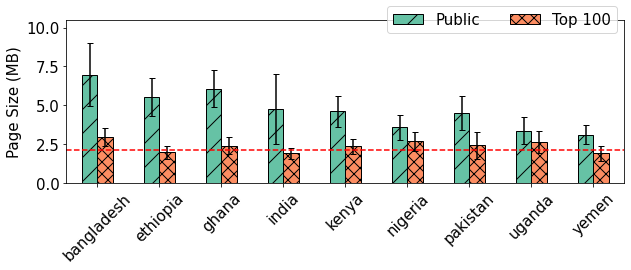

In [163]:
palette = sns.color_palette("Set2")
ax = page_size_df.plot(kind="bar",  color=palette, yerr=[errors,errors2], rot=45, ylim=(0,10.5), figsize=(10,3), capsize=3, edgecolor="black")
plt.axhline(y=2.15, color='r', linestyle='--' )

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(page_size_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Page Size (MB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/page_size.png", bbox_inches = 'tight')
plt.savefig("graphs/page_size.eps", bbox_inches = 'tight')

In [164]:
# public = pd.DataFrame()
# top = pd.DataFrame()
# public_dev = pd.DataFrame()
# top_dev = pd.DataFrame()
temp = []
temp2 = []
temp3 = []
temp4 = []
for country in all_countries:
    if country in countries:
      temp+= (dfs[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
      temp2+= (dfs_top[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
      print(country)
    else:
      temp3+= (dfs[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
      temp4+= (dfs_top[country]["summary"]["bytesIn"]/(1024*1024)).to_list()
      print("d", country)

# thresh = 50
# temp = [t for t in temp if t <thresh]
# temp2 = [t for t in temp2 if t <thresh]
# temp3 = [t for t in temp3 if t <thresh]
# temp4 = [t for t in temp4 if t <thresh]
public = pd.DataFrame(temp, columns=["MBs"])
top = pd.DataFrame(temp2,  columns=["MBs"])
public_dev = pd.DataFrame(temp3, columns=["MBs"])
top_dev = pd.DataFrame(temp4, columns=["MBs"])
top_dev

bangladesh
ethiopia
ghana
india
kenya
nigeria
pakistan
uganda
yemen
d australia
d canada
d france
d italy
d japan
d new zealand
d spain
d uk
d usa


,MBs
0,1.317176
1,2.039318
2,0.401915
3,1.317209
4,1.191786
...,...
895,2.640303
896,1.288895
897,3.187559
898,1.863393


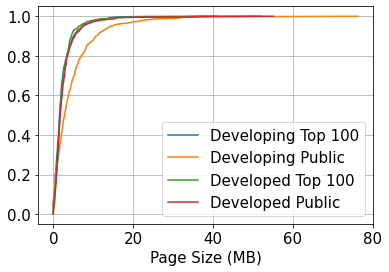

In [165]:
fig, ax = plt.subplots(1, 1)
stats_df = top \
.groupby('MBs') \
['MBs'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'MBs': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)



stats_df = public \
.groupby('MBs') \
['MBs'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'MBs': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)


stats_df = top_dev \
.groupby('MBs') \
['MBs'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'MBs': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)



stats_df = public_dev \
.groupby('MBs') \
['MBs'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'MBs': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.plot(x = 'MBs', y = ['cdf'], grid = True,ax=ax)

ax.legend(['Developing Top 100','Developing Public', 'Developed Top 100', 'Developed Public']);
ax.set_xlabel("Page Size (MB)")

plt.savefig("graphs/cdf.png", bbox_inches = 'tight')
plt.savefig("graphs/cdf.eps", bbox_inches = 'tight')

### **Sizes of Different Objects**

Public Sites

In [166]:
mean_bytes=[]
country_name=[]
for country in countries:
        country_name=country
        html=(dfs[country]["summary"]["bytes.html"]/(1024*1024)).mean()
        js=(dfs[country]["summary"]["bytes.js"]/(1024*1024)).mean()
        css=(dfs[country]["summary"]["bytes.css"]/(1024*1024)).mean()
        flash=(dfs[country]["summary"]["bytes.flash"]/(1024*1024)).mean()
        font=(dfs[country]["summary"]["bytes.font"]/(1024*1024)).mean()
        image=(dfs[country]["summary"]["bytes.image"]/(1024*1024)).mean()
        other=(dfs[country]["summary"]["bytes.other"]/(1024*1024)).mean()
        video=(dfs[country]["summary"]["bytes.video"]/(1024*1024)).mean()
#         mean_bytes.extend(html,js,css,flash,font,image,other,video)
        d = {'Country':country_name,'M Bytes in html':html, 'M Bytes in js': js, 'M Bytes in Css':css,'M Bytes in flash':flash,'M Bytes in font':font,'M Bytes in Image': image,'M Bytes in other':other, 'M Bytes in video':video}
        mean_bytes.append(d)
                                                   
df_average = pd.DataFrame(mean_bytes)
df_average
#         mean_bytes.append(dfs[country]["summary"][["bytes.html","bytes.js","bytes.css","bytes.image","bytes.flash","bytes.font","bytes.video","bytes.other"]].mean())
# temp=dfs[country]["summary"][["bytes.html"]].mean()
# temp


,Country,M Bytes in html,M Bytes in js,M Bytes in Css,M Bytes in flash,M Bytes in font,M Bytes in Image,M Bytes in other,M Bytes in video
0,bangladesh,0.234396,1.516524,0.277806,0.0,0.036884,3.914007,0.986742,0.000000
1,ethiopia,0.099085,1.208372,0.350596,0.0,0.206018,3.609600,0.044743,0.000000
2,ghana,0.108279,1.164800,0.510429,0.0,0.199008,3.830585,0.017227,0.246517
3,india,0.078266,0.576730,0.180925,0.0,0.078913,3.739907,0.011075,0.111306
4,kenya,0.101340,1.059480,0.408477,0.0,0.167179,2.856744,0.017560,0.016475
5,nigeria,0.089816,0.750037,0.458727,0.0,0.169495,2.094307,0.016739,0.010627
6,pakistan,0.106168,0.909376,0.341515,0.0,0.123905,2.823104,0.003443,0.181186
7,uganda,0.112877,0.566829,0.262698,0.0,0.110236,2.232175,0.009049,0.065785
8,yemen,0.066007,0.684715,0.370356,0.0,0.141449,1.806545,0.007273,0.034571


In [167]:
labels = ['html', 'js', 'css', 'image','flash','font','video','other']
# labels.sort()
for country,ind in zip(countries,df_average.index):
    sizes=(df_average['M Bytes in html'][ind], df_average['M Bytes in js'][ind],
    df_average['M Bytes in Css'][ind],df_average['M Bytes in Image'][ind],
    df_average['M Bytes in flash'][ind],df_average['M Bytes in font'][ind],
    df_average['M Bytes in video'][ind],df_average['M Bytes in other'][ind])
    fig = px.pie(df_average, values=sizes, names=labels, title=country)
#     color_discrete_map={'js': '#d62728',
#                         'html':'#ff7f0e',
#                         'font':'#9467bd',
#                         'css':'#2ca02c',
#                         'image':'#1f77b4',
#                         'other':'#17becf',
#                         'video': '#e377c2',
#                         'flash': '#bcbd22'}
    fig.show()

Top 100

In [168]:
mean_bytes=[]
country_name=[]
for country in countries:
        country_name=country
        html=(dfs_top[country]["summary"]["bytes.html"]/(1024*1024)).mean()
        js=(dfs_top[country]["summary"]["bytes.js"]/(1024*1024)).mean()
        css=(dfs_top[country]["summary"]["bytes.css"]/(1024*1024)).mean()
        flash=(dfs_top[country]["summary"]["bytes.flash"]/(1024*1024)).mean()
        font=(dfs_top[country]["summary"]["bytes.font"]/(1024*1024)).mean()
        image=(dfs_top[country]["summary"]["bytes.image"]/(1024*1024)).mean()
        other=(dfs_top[country]["summary"]["bytes.other"]/(1024*1024)).mean()
        video=(dfs_top[country]["summary"]["bytes.video"]/(1024*1024)).mean()
#         mean_bytes.extend(html,js,css,flash,font,image,other,video)
        d = {'Country':country_name,'M Bytes in html':html, 'M Bytes in js': js, 'M Bytes in Css':css,'M Bytes in flash':flash,'M Bytes in font':font,'M Bytes in Image': image,'M Bytes in other':other, 'M Bytes in video':video}
        mean_bytes.append(d)
                                                   
df_average2 = pd.DataFrame(mean_bytes)
df_average2
#         mean_bytes.append(dfs[country]["summary"][["bytes.html","bytes.js","bytes.css","bytes.image","bytes.flash","bytes.font","bytes.video","bytes.other"]].mean())
# temp=dfs[country]["summary"][["bytes.html"]].mean()
# temp


,Country,M Bytes in html,M Bytes in js,M Bytes in Css,M Bytes in flash,M Bytes in font,M Bytes in Image,M Bytes in other,M Bytes in video
0,bangladesh,0.110829,0.999482,0.098751,0.0,0.157721,1.442652,0.053284,0.077842
1,ethiopia,0.058376,0.739515,0.092951,0.0,0.093143,0.886226,0.029565,0.063753
2,ghana,0.082059,0.888650,0.079524,0.0,0.091520,1.104631,0.048242,0.114085
3,india,0.089876,0.854645,0.045953,0.0,0.106177,0.630211,0.043578,0.126596
4,kenya,0.089860,0.955128,0.077045,0.0,0.132104,0.867741,0.029001,0.210122
5,nigeria,0.096517,1.019572,0.086320,0.0,0.104818,1.074673,0.048072,0.257877
6,pakistan,0.057100,0.747725,0.060592,0.0,0.121683,1.192087,0.030906,0.199215
7,uganda,0.061256,0.783216,0.118389,0.0,0.110943,1.328866,0.076756,0.157189
8,yemen,0.062766,0.584072,0.078760,0.0,0.107139,0.956469,0.030410,0.078824


In [169]:
labels = ['html', 'js', 'css', 'image','flash','font','video','other']
labels.sort()
for country,ind in zip(countries,df_average.index):
    sizes=(df_average2['M Bytes in html'][ind], df_average2['M Bytes in js'][ind],
    df_average2['M Bytes in Css'][ind],df_average2['M Bytes in Image'][ind],
    df_average2['M Bytes in flash'][ind],df_average2['M Bytes in font'][ind],
    df_average2['M Bytes in video'][ind],df_average2['M Bytes in other'][ind])
    fig = px.pie(df_average2, values=sizes, names=labels, title=country)
    fig.show()

In [170]:
df_average3 = df_average.mean().to_frame().rename(columns={0:"Public Service"}).merge(df_average2.mean().to_frame().rename(columns={0:"Top 100"}), left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [171]:
std_dist = df_average.std().to_frame().rename(columns={0:"Public Service"}).merge(df_average2.std().to_frame().rename(columns={0:"Top 100"}), left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [172]:
std_dist.index = std_dist.index.str.replace('M Bytes in ', '')
std_dist.index = std_dist.index.str.lower()
std_dist
std_dist

,Public Service,Top 100
html,0.048785,0.019520
js,0.324533,0.141790
css,0.101778,0.021042
flash,0.000000,0.000000
font,0.055767,0.020738
image,0.816194,0.250152
other,0.323837,0.015729
video,0.088418,0.067835


In [173]:
df_average3["Public Service"] = df_average3["Public Service"]/df_average3["Public Service"].sum()*100
df_average3["Top 100"] = df_average3["Top 100"]/df_average3["Top 100"].sum()*100
df_average3 = df_average3.rename({"Public Service" : "Public"}, axis=1)

In [174]:
df_average3.index = df_average3.index.str.replace('M Bytes in ', '')
df_average3.index = df_average3.index.str.lower()
df_average3
# print(type(df_average3))

,Public,Top 100
html,2.343256,3.342152
js,19.844438,35.711864
css,7.436264,3.481973
flash,0.000000,0.000000
font,2.900355,4.835383
image,63.288183,44.727321
other,2.619901,1.838480
video,1.567603,6.062826


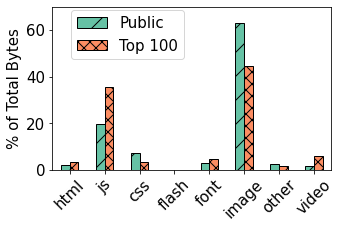

In [175]:
# palette = sns.color_palette("pastel")
palette = sns.color_palette("Set2")


ax = df_average3.plot(kind="bar",rot=45, ylabel="% of Total Bytes",color=palette, edgecolor="black", ylim=(0,70), figsize=(5,3))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(df_average3))]


for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(0.5, 0.83), ncol=1)
plt.savefig("graphs/perc_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/perc_bytes.eps", bbox_inches = 'tight')

In [176]:
df_average3

,Public,Top 100
html,2.343256,3.342152
js,19.844438,35.711864
css,7.436264,3.481973
flash,0.000000,0.000000
font,2.900355,4.835383
image,63.288183,44.727321
other,2.619901,1.838480
video,1.567603,6.062826


###**Image Types**


In [177]:
# Public
for country in countries:
  contain_values = dfs[country]['details'][dfs[country]['details']['contentType'].str.contains('image',na=False)]
  print(contain_values['contentType'].unique())
   
  #  top 100
for country in countries:
  contain_values2 = dfs_top[country]['details'][dfs_top[country]['details']['contentType'].str.contains('image',na=False)]
  print(contain_values2['contentType'].unique())
  

['image/vnd.microsoft.icon' 'image/png' 'image/jpeg' 'image/gif'
 'image/bmp' 'image/svg+xml' 'image/webp' 'image/x-icon' 'image/jpg']
['image/png' 'image/jpeg' 'image/gif' 'image/webp' 'image/svg+xml'
 'image/x-icon' 'image/vnd.microsoft.icon' 'image/bmp']
['image/png' 'image/svg+xml' 'image/jpeg' 'image/gif' 'image/x-icon'
 'image/webp' 'image/bmp' 'image/vnd.microsoft.icon']
['image/gif' 'image/png' 'image/jpeg' 'image/vnd.microsoft.icon'
 'image/svg+xml' 'image/x-icon' 'image/webp' 'image/bmp']
['image/png' 'image/svg+xml' 'image/gif' 'image/bmp' 'image/webp'
 'image/jpeg' 'image/vnd.microsoft.icon' 'image/x-icon' 'image/avif']
['image/png' 'image/jpeg' 'image/gif' 'image/x-icon'
 'image/vnd.microsoft.icon' 'image/svg+xml' 'image/webp' 'image/bmp']
['image/png' 'image/gif' 'image/jpeg' 'image/avif' 'image/svg+xml'
 'image/bmp' 'image/x-icon' 'image/pjpeg' 'image/vnd.microsoft.icon'
 'image/webp' 'image/jpg']
['image/png' 'image/jpeg' 'image/gif' 'image/x-icon' 'image/webp'
 'image/

Total 9 Types

1.   image/png
2.   image/gif
3.   image/jpeg or image/jpg or image/pjpeg
4.   image/avif
5.   image/svg+xml
6.   image/x-icon
7.   image/vnd.microsoft.icon
8.   image/webp
9.   image/bmp


In [178]:

list_image_public=[0]*9
list_image_top=[0]*9

for country in countries:
  list_image_public[0]+=(dfs[country]['details']['contentType']=='image/png').sum()
  list_image_public[1]+=(dfs[country]['details']['contentType']=='image/gif').sum()
  list_image_public[2]+=(dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)).sum()
  list_image_public[3]+=(dfs[country]['details']['contentType']=='image/avif').sum()
  list_image_public[4]+=(dfs[country]['details']['contentType']=='svg+xml').sum()
  list_image_public[5]+=(dfs[country]['details']['contentType']=='x-icon').sum()
  list_image_public[6]+=(dfs[country]['details']['contentType']=='image/vnd.microsoft.icon').sum()
  list_image_public[7]+=(dfs[country]['details']['contentType']=='image/webp').sum()
  list_image_public[8]+=(dfs[country]['details']['contentType']=='image/bmp').sum()

for country in countries:
  list_image_top[0]+=(dfs_top[country]['details']['contentType']=='image/png').sum()
  list_image_top[1]+=(dfs_top[country]['details']['contentType']=='image/gif').sum()
  list_image_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)).sum()
  list_image_top[3]+=(dfs_top[country]['details']['contentType']=='image/avif').sum()
  list_image_top[4]+=(dfs_top[country]['details']['contentType']=='svg+xml').sum()
  list_image_top[5]+=(dfs_top[country]['details']['contentType']=='x-icon').sum()
  list_image_top[6]+=(dfs_top[country]['details']['contentType']=='image/vnd.microsoft.icon').sum()
  list_image_top[7]+=(dfs_top[country]['details']['contentType']=='image/webp').sum()
  list_image_top[8]+=(dfs_top[country]['details']['contentType']=='image/bmp').sum()

print(list_image_public)
print(list_image_top)



[8425, 1278, 12381, 5, 0, 0, 82, 498, 66]
[12374, 16121, 12013, 429, 0, 0, 112, 4742, 1]


In [179]:

image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()
# fig = px.bar(x=image_labels, y=list_image_public
#              title="Number of Requests per Image Type",text=list_image,
#              labels={'x':'Image Types',
#                      'y':'No. of Requests'})

# fig = go.Figure(data=[
#                       go.Bar(x=image_labels, y=list_image_top)],
fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=list_image_public,text=list_image_public),
    go.Bar(name="Top 100",x=image_labels, y=list_image_top,text=list_image_top)])
fig.update_layout( title="Number of Requests per Image Type", 
                  title_text="Number of Requests per Image Type",
                  title_x=0.5,
                  autosize=False,
                  width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Types")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

In [180]:
formatSizes_public=[0]*11
formatSizes_top=[0]*11

for country in countries:
  formatSizes_public[0]=formatSizes_public[0]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[1]=formatSizes_public[1]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[2]=formatSizes_public[2]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[3]=formatSizes_public[3]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[4]=formatSizes_public[4]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[5]=formatSizes_public[5]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[6]=formatSizes_public[6]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[7]=formatSizes_public[7]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[8]=formatSizes_public[8]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[9]=formatSizes_public[9]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_public[10]=formatSizes_public[10]+ dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024)



for country in countries:
  formatSizes_top[0]=formatSizes_top[0]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[1]=formatSizes_top[1]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[2]=formatSizes_top[2]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[3]=formatSizes_top[3]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[4]=formatSizes_top[4]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[5]=formatSizes_top[5]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[6]=formatSizes_top[6]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[7]=formatSizes_top[7]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[8]=formatSizes_top[8]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[9]=formatSizes_top[9]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024)
  formatSizes_top[10]=formatSizes_top[10]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024)

 


formatSizes_public = np.round_(formatSizes_public, decimals = 3)
formatSizes_top = np.round_(formatSizes_top, decimals = 3)

print(formatSizes_public) 
print(formatSizes_top)

[2.670293e+03 2.976660e+02 7.928470e+02 9.304800e+01 7.910000e-01
 1.030800e+01 1.076030e+02 7.744200e+01 6.190000e+01 1.414900e+01
 1.073700e+01]
[1218.152   94.823  990.068   94.479    0.      25.391  108.88     6.26
  151.976   34.906   33.627]


In [181]:
content_labels=['Image','CSS','Javascript','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=formatSizes_public,text=formatSizes_public),
    go.Bar(name="Top 100",x=content_labels, y=formatSizes_top,text=formatSizes_top)])
fig.update_layout( title="Content Sizes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Type")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Font','Video','Octet-stream/Binary','XML']})


fig.show()

In [182]:
formatAvgSizes1_public=[0]*11
formatAvgSizes2_top=[0]*11

for country in countries:
  formatAvgSizes1_public[0]=formatAvgSizes1_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[1]=formatAvgSizes1_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[2]=formatAvgSizes1_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[3]=formatAvgSizes1_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[4]=formatAvgSizes1_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[5]=formatAvgSizes1_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[6]=formatAvgSizes1_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[7]=formatAvgSizes1_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[8]=formatAvgSizes1_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[9]=formatAvgSizes1_public[9]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes1_public[10]=formatAvgSizes1_public[10]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))



for country in countries:
  formatAvgSizes2_top[0]=formatAvgSizes2_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[1]=formatAvgSizes2_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[2]=formatAvgSizes2_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[3]=formatAvgSizes2_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[4]=formatAvgSizes2_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[5]=formatAvgSizes2_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[6]=formatAvgSizes2_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[7]=formatAvgSizes2_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[8]=formatAvgSizes2_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[9]=formatAvgSizes2_top[9]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))
  formatAvgSizes2_top[10]=formatAvgSizes2_top[10]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))

 
count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()

# formatAvgSizes1_public = [x/len(countries) for x in formatAvgSizes1_public]
# formatAvgSizes2_top = [x/len(countries) for x in formatAvgSizes2_top]

formatAvgSizes1_public = [x/count1 for x in formatAvgSizes1_public]
formatAvgSizes2_top = [x/count2 for x in formatAvgSizes2_top]


formatAvgSizes1_public = np.round_(formatAvgSizes1_public, decimals = 3)
formatAvgSizes2_top = np.round_(formatAvgSizes2_top, decimals = 3)

print(formatAvgSizes1_public) 
print(formatAvgSizes2_top)

[3.187e+00 3.550e-01 9.460e-01 1.110e-01 1.000e-03 1.200e-02 1.280e-01
 9.200e-02 7.400e-02 1.700e-02 1.300e-02]
[1.354 0.105 1.1   0.105 0.    0.028 0.121 0.007 0.169 0.039 0.037]


In [183]:
content_labels=['image','css','javascript','html','pdf','xml','font','audio','video','json','octet-stream/binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=formatAvgSizes1_public,text=formatAvgSizes1_public),
    go.Bar(name="Top 100",x=content_labels, y=formatAvgSizes2_top,text=formatAvgSizes2_top)])
fig.update_layout( title="Average Content Sizes (per url)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Type")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Font','Video','Octet-stream/Binary','XML']})


fig.show()

In [184]:
details_public = []
for country in countries:
  details_public.append(dfs[country]['summary'].copy())
df_summ_public = pd.concat(details_public, axis=0)

details_top = []
for country in countries:
  details_top.append(dfs_top[country]['summary'].copy())
df_summ_top = pd.concat(details_top, axis=0)

In [185]:
img_mean = df_summ_public["bytes.image"].mean()/(1024*1024)
img_std = df_summ_public["bytes.image"].std()/(1024*1024)
img_err = 1.96 * img_std/np.sqrt(len(df_summ_public["bytes.image"]))
img_err

js_mean = df_summ_public["bytes.js"].mean()/(1024*1024)
js_std = df_summ_public["bytes.js"].std()/(1024*1024)
js_err = 1.96 * js_std/np.sqrt(len(df_summ_public["bytes.js"]))
js_err

html_mean = df_summ_public["bytes.html"].mean()/(1024*1024)
html_std = df_summ_public["bytes.html"].std()/(1024*1024)
html_err = 1.96 * html_std/np.sqrt(len(df_summ_public["bytes.html"]))
html_err

css_mean = df_summ_public["bytes.css"].mean()/(1024*1024)
css_std = df_summ_public["bytes.css"].std()/(1024*1024)
css_err = 1.96 * css_std/np.sqrt(len(df_summ_public["bytes.css"]))

font_mean = df_summ_public["bytes.font"].mean()/(1024*1024)
font_std = df_summ_public["bytes.font"].std()/(1024*1024)
font_err = 1.96 * font_std/np.sqrt(len(df_summ_public["bytes.font"]))

public_errs = [css_err, font_err,html_err, img_err, js_err]

img_mean_t = df_summ_top["bytes.image"].mean()/(1024*1024)
img_std_t = df_summ_top["bytes.image"].std()/(1024*1024)
img_err_t = 1.96 * img_std_t/np.sqrt(len(df_summ_top["bytes.image"]))
img_err_t

js_mean_t = df_summ_top["bytes.js"].mean()/(1024*1024)
js_std_t = df_summ_top["bytes.js"].std()/(1024*1024)
js_err_t = 1.96 * js_std_t/np.sqrt(len(df_summ_top["bytes.js"]))
js_err_t

html_mean_t = df_summ_top["bytes.html"].mean()/(1024*1024)
html_std_t = df_summ_top["bytes.html"].std()/(1024*1024)
html_err_t = 1.96 * html_std_t/np.sqrt(len(df_summ_top["bytes.html"]))
html_err

font_mean_t = df_summ_top["bytes.font"].mean()/(1024*1024)
font_std_t = df_summ_top["bytes.font"].std()/(1024*1024)
font_err_t = 1.96 * font_std_t/np.sqrt(len(df_summ_top["bytes.font"]))

css_mean_t = df_summ_top["bytes.css"].mean()/(1024*1024)
css_std_t = df_summ_top["bytes.css"].std()/(1024*1024)
css_err_t = 1.96 * css_std_t/np.sqrt(len(df_summ_top["bytes.css"]))

top_errs = [css_err, font_err_t, html_err, img_err, js_err]
to_plot_b = [[css_mean, css_mean_t],[font_mean, font_mean_t],[html_mean, html_mean_t],[img_mean, img_mean_t],[js_mean, js_mean_t]]


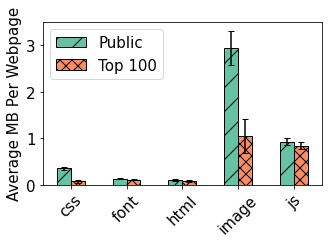

In [186]:

type_bytes = pd.DataFrame(to_plot_b, columns=["Public", "Top 100"], index=["css", "font","html", "image", "js"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average MB Per Webpage",rot=45,ylim=(0,3.5), figsize=(5,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.savefig("graphs/type_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/type_bytes.eps", bbox_inches = 'tight')

In [187]:
type_bytes

,Public,Top 100
css,0.354677,0.082032
font,0.138468,0.113917
html,0.110319,0.078738
image,2.941774,1.053728
js,0.927589,0.841334


In [188]:
# formatAvgSizes_public=[0]*11
# formatAvgSizes_top=[0]*11

# for country in countries:
#   formatAvgSizes_public[0]=formatAvgSizes_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[1]=formatAvgSizes_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[2]=formatAvgSizes_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[3]=formatAvgSizes_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[4]=formatAvgSizes_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[5]=formatAvgSizes_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[6]=formatAvgSizes_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[7]=formatAvgSizes_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[8]=formatAvgSizes_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[9]=formatAvgSizes_public[9]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
#   formatAvgSizes_public[10]=formatAvgSizes_public[10]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()



# for country in countries:
#   formatAvgSizes_top[0]=formatAvgSizes_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[1]=formatAvgSizes_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("css",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[2]=formatAvgSizes_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("js|javascript",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[3]=formatAvgSizes_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("html",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[4]=formatAvgSizes_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[5]=formatAvgSizes_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("xml",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[6]=formatAvgSizes_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("font",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[7]=formatAvgSizes_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("audio",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[8]=formatAvgSizes_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("video",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[9]=formatAvgSizes_top[9]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("json",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()
#   formatAvgSizes_top[10]=formatAvgSizes_top[10]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)].bytesIn.sum()/(1024*1024))/dfs_top[country]['summary']['final_url'].count()

 

# # formatAvgSizes_public = [x/len(countries) for x in formatAvgSizes_public]
# # formatAvgSizes_top = [x/len(countries) for x in formatAvgSizes_top]

# formatAvgSizes_public = np.round_(formatAvgSizes_public, decimals = 3)
# formatAvgSizes_top = np.round_(formatAvgSizes_top, decimals = 3)

# print(formatAvgSizes_public) 
# print(formatAvgSizes_top)

In [189]:
# content_labels=['Image','CSS','Javascript','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']

# fig=go.Figure(data=[
#     go.Bar(name="Public",x=content_labels, y=formatAvgSizes_public,text=formatAvgSizes_public),
#     go.Bar(name="Top 100",x=content_labels, y=formatAvgSizes_top,text=formatAvgSizes_top)])
# fig.update_layout( title="Average Content Sizes", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# fig.update_xaxes(title_text="Content Type")
# fig.update_yaxes(title_text="MBs")
# fig.update_yaxes(automargin=True)


# fig.show()

In [190]:
  # formatAvgSizes_public[0]=formatAvgSizes_public[0]+
# (dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()
# dfs
  # formatAvgSizes_public[0]=formatAvgSizes_public[0]+
# (dfs['pakistan']['details'].loc[dfs['pakistan']['details']['contentType'].str.contains("image",na=False)].bytesIn.sum()/(1024*1024))/dfs[country]['summary']['final_url'].count()


### **Content Type**

In [191]:
# Public
for country in countries:
  print(dfs[country]['details']['contentType'].value_counts())
   
# top
for country in countries:
  print(dfs_top[country]['details']['contentType'].value_counts())

text/html                       1209
image/jpeg                       928
application/json                 877
image/png                        857
application/javascript           826
text/css                         792
text/javascript                  467
application/json+protobuf        370
text/plain                       101
application/x-protobuf            85
image/gif                         68
image/vnd.microsoft.icon          40
audio/mpeg                        30
font/woff2                        26
image/svg+xml                     24
image/jpg                         20
application/x-javascript          17
image/bmp                         14
image/webp                        12
image/x-icon                       6
application/font-woff              3
font/woff                          2
font/ttf                           2
text/xml                           1
audio/mpegurl                      1
application/pdf                    1
application/font-woff2             1
a

very Rare 'vnd.oasis.opendocument.formula-template '

Content Types


1.   image
2.   javascript
3.   css
4.   html
5.   pdf
6.   xml
7.   font
8.   audio
9.   video
10.   json
11.   octet-stream/binary    
 




In [192]:
list_content_public=[0]*11
list_content_top=[0]*11

# public

for country in countries:
  list_content_public[0]+=(dfs[country]['details']['contentType'].str.contains("image",na=False)).sum()
  list_content_public[1]+=(dfs[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  list_content_public[1]+=(dfs[country]['details']['contentType']=='js').sum()
  list_content_public[2]+=(dfs[country]['details']['contentType'].str.contains("css",na=False)).sum()
  list_content_public[3]+=(dfs[country]['details']['contentType'].str.contains("html",na=False)).sum()
  list_content_public[4]+=(dfs[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  list_content_public[5]+=(dfs[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  list_content_public[6]+=(dfs[country]['details']['contentType'].str.contains("font",na=False)).sum()
  list_content_public[7]+=(dfs[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  list_content_public[8]+=(dfs[country]['details']['contentType'].str.contains("video",na=False)).sum()
  list_content_public[9]+=(dfs[country]['details']['contentType'].str.contains("json",na=False)).sum()
  list_content_public[10]+=(dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

# top 100
for country in countries:
  list_content_top[0]+=(dfs_top[country]['details']['contentType'].str.contains("image",na=False)).sum()
  list_content_top[1]+=(dfs_top[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  list_content_top[1]+=(dfs_top[country]['details']['contentType']=='js').sum()
  list_content_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("css",na=False)).sum()
  list_content_top[3]+=(dfs_top[country]['details']['contentType'].str.contains("html",na=False)).sum()
  list_content_top[4]+=(dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  list_content_top[5]+=(dfs_top[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  list_content_top[6]+=(dfs_top[country]['details']['contentType'].str.contains("font",na=False)).sum()
  list_content_top[7]+=(dfs_top[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  list_content_top[8]+=(dfs_top[country]['details']['contentType'].str.contains("video",na=False)).sum()
  list_content_top[9]+=(dfs_top[country]['details']['contentType'].str.contains("json",na=False)).sum()
  list_content_top[10]+=(dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

print(list_content_public)
print(list_content_top)



[23369, 19452, 14505, 5441, 2, 527, 2465, 49, 538, 2934, 139]
[51291, 32718, 7615, 16449, 0, 5438, 2679, 81, 252, 9147, 832]


In [193]:

content_labels=['Image','Javascript','CSS','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=list_content_public,text=list_content_public),
    go.Bar(name="Top 100",x=content_labels, y=list_content_top,text=list_content_top)])
# title="Number of Requests per Content Type", 
#                   title_x=0.5,
fig.update_layout( title="Number of Requests per Content Type", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Types")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','CSS','HTML','Json','XML','Font','Octet-stream/Binary','Video']})


fig.show()

In [194]:
listavg_content_public=[0]*11
listavg_content_top=[0]*11

# public

for country in countries:
  listavg_content_public[0]+=(dfs[country]['details']['contentType'].str.contains("image",na=False)).sum()
  listavg_content_public[1]+=(dfs[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  listavg_content_public[1]+=(dfs[country]['details']['contentType']=='js').sum()
  listavg_content_public[2]+=(dfs[country]['details']['contentType'].str.contains("css",na=False)).sum()
  listavg_content_public[3]+=(dfs[country]['details']['contentType'].str.contains("html",na=False)).sum()
  listavg_content_public[4]+=(dfs[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  listavg_content_public[5]+=(dfs[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  listavg_content_public[6]+=(dfs[country]['details']['contentType'].str.contains("font",na=False)).sum()
  listavg_content_public[7]+=(dfs[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  listavg_content_public[8]+=(dfs[country]['details']['contentType'].str.contains("video",na=False)).sum()
  listavg_content_public[9]+=(dfs[country]['details']['contentType'].str.contains("json",na=False)).sum()
  listavg_content_public[10]+=(dfs[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()

# top 100
for country in countries:
  listavg_content_top[0]+=(dfs_top[country]['details']['contentType'].str.contains("image",na=False)).sum()
  listavg_content_top[1]+=(dfs_top[country]['details']['contentType'].str.contains("javascript",na=False)).sum()
  listavg_content_top[1]+=(dfs_top[country]['details']['contentType']=='js').sum()
  listavg_content_top[2]+=(dfs_top[country]['details']['contentType'].str.contains("css",na=False)).sum()
  listavg_content_top[3]+=(dfs_top[country]['details']['contentType'].str.contains("html",na=False)).sum()
  listavg_content_top[4]+=(dfs_top[country]['details']['contentType'].str.contains("pdf",na=False)).sum()
  listavg_content_top[5]+=(dfs_top[country]['details']['contentType'].str.contains("xml",na=False)).sum()
  listavg_content_top[6]+=(dfs_top[country]['details']['contentType'].str.contains("font",na=False)).sum()
  listavg_content_top[7]+=(dfs_top[country]['details']['contentType'].str.contains("audio",na=False)).sum()
  listavg_content_top[8]+=(dfs_top[country]['details']['contentType'].str.contains("video",na=False)).sum()
  listavg_content_top[9]+=(dfs_top[country]['details']['contentType'].str.contains("json",na=False)).sum()
  listavg_content_top[10]+=(dfs_top[country]['details']['contentType'].str.contains("octet-stream|binary",na=False)).sum()


count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()



# listavg_content_public=[x/len(countries) for x in listavg_content_public]
# listavg_content_top=[x/len(countries) for x in listavg_content_top]

listavg_content_public = [x/count1 for x in listavg_content_public]
listavg_content_top = [x/count2 for x in listavg_content_top]


listavg_content_public=[np.round(x,2) for x in listavg_content_public]
listavg_content_top=[np.round(x,2) for x in listavg_content_top]

print(listavg_content_public)
print(listavg_content_top)



[27.89, 23.21, 17.31, 6.49, 0.0, 0.63, 2.94, 0.06, 0.64, 3.5, 0.17]
[56.99, 36.35, 8.46, 18.28, 0.0, 6.04, 2.98, 0.09, 0.28, 10.16, 0.92]


In [195]:

content_labels=['Image','Javascript','CSS','HTML','PDF','XML','Font','Audio','Video','Json','Octet-stream/Binary']
# content_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=content_labels, y=listavg_content_public,text=listavg_content_public),
    go.Bar(name="Top 100",x=content_labels, y=listavg_content_top,text=listavg_content_top)])

fig.update_layout(title="Average No. of Requests per Content Type", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Content Types")
fig.update_yaxes(title_text="Average No. of Requests")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Image','Javascript','HTML','CSS','Json','XML','Font','Octet-stream/Binary','Video']})


fig.show()

27.891408114558473

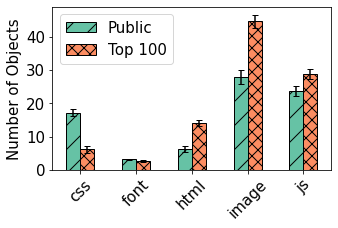

In [196]:
img_mean = df_summ_public["requests.image"].mean()
img_std = df_summ_public["requests.image"].std()
img_err = 1.96 * img_std/np.sqrt(len(df_summ_public["requests.image"]))
img_err

js_mean = df_summ_public["requests.js"].mean()
js_std = df_summ_public["requests.js"].std()
js_err = 1.96 * js_std/np.sqrt(len(df_summ_public["requests.js"]))
js_err

html_mean = df_summ_public["requests.html"].mean()
html_std = df_summ_public["requests.html"].std()
html_err = 1.96 * html_std/np.sqrt(len(df_summ_public["requests.html"]))
html_err


font_mean = df_summ_public["requests.font"].mean()
font_std = df_summ_public["requests.font"].std()
font_err = 1.96 * font_std/np.sqrt(len(df_summ_public["requests.font"]))

css_mean = df_summ_public["requests.css"].mean()
css_std = df_summ_public["requests.css"].std()
css_err = 1.96 * css_std/np.sqrt(len(df_summ_public["requests.css"]))

public_errs = [css_err, font_err, html_err, img_err, js_err]

img_mean_t = df_summ_top["requests.image"].mean()
img_std_t = df_summ_top["requests.image"].std()
img_err_t = 1.96 * img_std_t/np.sqrt(len(df_summ_top["requests.image"]))
img_err_t

js_mean_t = df_summ_top["requests.js"].mean()
js_std_t = df_summ_top["requests.js"].std()
js_err_t = 1.96 * js_std_t/np.sqrt(len(df_summ_top["requests.js"]))
js_err_t

html_mean_t = df_summ_top["requests.html"].mean()
html_std_t = df_summ_top["requests.html"].std()
html_err_t = 1.96 * html_std_t/np.sqrt(len(df_summ_top["requests.html"]))
html_err

font_mean_t = df_summ_top["requests.font"].mean()
font_std_t = df_summ_top["requests.font"].std()
font_err_t = 1.96 * font_std_t/np.sqrt(len(df_summ_top["bytes.font"]))

css_mean_t = df_summ_top["requests.css"].mean()
css_std_t = df_summ_top["requests.css"].std()
css_err_t = 1.96 * css_std_t/np.sqrt(len(df_summ_top["requests.css"]))

top_errs = [css_err, font_err, html_err, img_err, js_err]
to_plot = [[css_mean, css_mean_t],[font_mean, font_mean_t],[html_mean, html_mean_t],[img_mean, img_mean_t],[js_mean, js_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["css", "font", "html", "image", "js"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Objects",rot=45, figsize=(5,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.savefig("graphs/type_reqs.png", bbox_inches = 'tight')
plt.savefig("graphs/type_reqs.eps", bbox_inches = 'tight')
img_mean


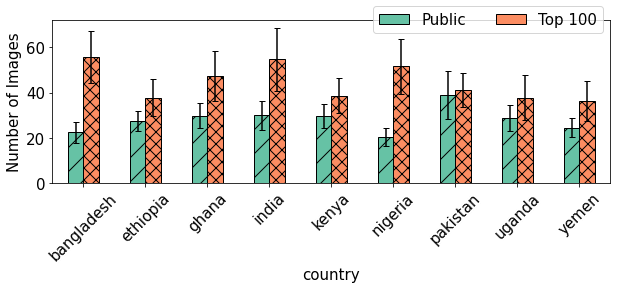

In [197]:
country_image_reqs = []
public_errs = []
top_errs = []
for country in countries:
  pub_std = dfs[country]["summary"]["requests.image"].std()
  pub_err = 1.96 * pub_std/np.sqrt(len(dfs[country]["summary"]["requests.image"]))
  public_errs.append(pub_err)

  top_std = dfs_top[country]["summary"]["requests.image"].std()
  top_err = 1.96 * top_std/np.sqrt(len(dfs_top[country]["summary"]["requests.image"]))
  top_errs.append(top_err)

  country_image_reqs.append([country, dfs[country]["summary"]["requests.image"].mean(), dfs_top[country]["summary"]["requests.image"].mean()])
country_image_reqs_df =pd.DataFrame(country_image_reqs, columns=["country", "Public", "Top 100"]).set_index("country")

ax = country_image_reqs_df.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Images",rot=45, figsize=(10,3))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(country_image_reqs_df))]
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
  
plt.savefig("graphs/total_image_reqs.png", bbox_inches = 'tight')
plt.savefig("graphs/total_image_reqs.eps", bbox_inches = 'tight')

In [198]:
# summary5 =pd.read_csv(public +"bangladesh_summary.csv")
# df=pd.DataFrame()
# df={'summary':summary5}
# df['summary']['requests'].sum()

###**Requests per Country**

Public & Top 100 Separate

In [199]:
requests_public=[0]*len(countries)
requests_top=[0]*len(countries)

i=0
for country in countries:
  requests_public[i]=dfs[country]['summary']['requests'].sum()
  count=dfs[country]['summary']['final_url'].count()
  requests_public[i]=round(requests_public[i]/count)
  i=i+1

j=0
for country in countries:
  requests_top[j]=dfs_top[country]['summary']['requests'].sum()
  count=dfs_top[country]['summary']['final_url'].count()
  requests_top[j]=round(requests_top[j]/count)
  j=j+1

print(requests_public)
print(requests_top)

[82, 100, 94, 65, 99, 82, 96, 86, 71]
[163, 101, 132, 161, 125, 145, 112, 103, 87]


In [200]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=requests_public,text=requests_public),
    go.Bar(name="Top 100",x=countries, y=requests_top,text=requests_top)])
#  title="Average Number of Requests per url", 
#                   title_x=0.5,

fig.update_layout(width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average number of requests")
fig.update_yaxes(automargin=True)


fig.show()

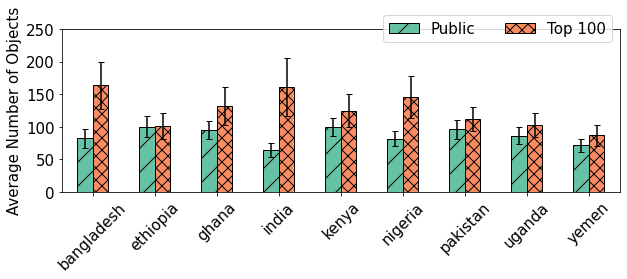

In [201]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["requests"]
    temp2 = dfs_top[country]["summary"]["requests"]
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,250))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Number of Objects")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/reqs_country.png", bbox_inches = 'tight')
plt.savefig("graphs/reqs_country.eps", bbox_inches = 'tight')

Public & Top aggregated

In [202]:
aggregated_requests=[0]*len(countries)
k=0
for requests_p,requests_t in zip(requests_public,requests_top):
  aggregated_requests[k]= requests_p+requests_t 
  k=k+1


aggregated_requests

[245, 201, 226, 226, 224, 227, 208, 189, 158]

In [203]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=aggregated_requests,text=aggregated_requests)])
fig.update_layout( title="Average Number of Requests per Url", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

###**Total Image Bytes**

Image Sizes per country (public & Top 100)

In [204]:
imageTotalbytes_public=[0]*len(countries)
imageTotalbytes_top=[0]*len(countries)

i=0
for country in countries:
  imageTotalbytes_public[i]=round(((dfs[country]['summary']['bytes.image'].sum())/(1024*1024)),2)
  i=i+1

i=0
for country in countries:
  imageTotalbytes_top[i]=round(((dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024)),2)
  i=i+1

print(imageTotalbytes_public)
print(imageTotalbytes_top)

[336.6, 328.47, 352.41, 291.71, 245.68, 234.56, 276.66, 245.54, 153.56]
[144.27, 88.62, 110.46, 63.02, 86.77, 107.47, 119.21, 132.89, 95.65]


In [205]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=imageTotalbytes_public,text=imageTotalbytes_public),
    go.Bar(name="Top 100",x=countries, y=imageTotalbytes_top,text=imageTotalbytes_top)])
fig.update_layout( title="Total Image Bytes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

###**Aggregated**

In [206]:
public_imageBytes=round(sum(imageTotalbytes_public),2)
top_imageBytes=round(sum(imageTotalbytes_top),2)
print(public_imageBytes)
print(top_imageBytes)

2465.19
948.36


In [207]:

array_pImages=[]
array_tImages=[]
array_pImages.append(public_imageBytes)
array_tImages.append(top_imageBytes)

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'], y=array_pImages,text=array_pImages),
    go.Bar(name="Top 100",x=['Top 100'], y=array_tImages,text=array_tImages)])
fig.update_layout( title="Total Image Bytes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

In [208]:

# imagebytes_public=[0]*9
# imagebytes_top=[0]*9

# i=0
# for country in countries:
#   imagebytes_public[i]=(dfs[country]['details']['contentType'].str.contains('image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp',na=False)).sum()
#   i=i+1


# i=0
# for country in countries:
#   imagebytes_top[i]=(dfs_top[country]['details']['contentType'].str.contains('image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp',na=False)).sum()
#   i=i+1

# print(imagebytes_public)
# print(imagebytes_top)

In [209]:
dfs[country]['summary']['bytes.image'].dtypes

dtype('int64')

In [210]:
imagebytes_public=[0]*len(countries)
imagebytes_top=[0]*len(countries)

i=0
for country in countries:
  imagebytes_public[i]=round(((dfs[country]['summary']['bytes.image'].mean())/(1024*1024)),2)
  i=i+1

i=0
for country in countries:
  imagebytes_top[i]=round(((dfs_top[country]['summary']['bytes.image'].mean())/(1024*1024)),2)
  i=i+1

print(imagebytes_public)
print(imagebytes_top)

[3.91, 3.61, 3.83, 3.74, 2.86, 2.09, 2.82, 2.23, 1.81]
[1.44, 0.89, 1.1, 0.63, 0.87, 1.07, 1.19, 1.33, 0.96]


In [211]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=imagebytes_public,text=imagebytes_public),
    go.Bar(name="Top 100",x=countries, y=imagebytes_top,text=imagebytes_top)])
fig.update_layout( title="Average Image Sizes (M Bytes) per Url", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Image mega bytes")
fig.update_yaxes(automargin=True)


fig.show()

2.040651816952357

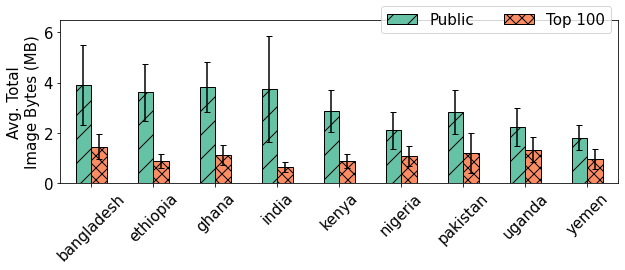

In [212]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["bytes.image"]/(1024*1024)
    temp2 = dfs_top[country]["summary"]["bytes.image"]/(1024*1024)
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,6.5))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Avg. Total\nImage Bytes (MB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/bytes_total_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/bytes_total_image_country.eps", bbox_inches = 'tight')

((reqs_df["Public"] - reqs_df["Top 100"])/reqs_df["Top 100"]).mean()

In [213]:
np.mean(reqs_df)

Public     2.989664
Top 100    1.053728
dtype: float64

In [214]:
np.mean(imagebytes_top)

1.0533333333333335

In [215]:
max_avg=[*map(max, zip(imagebytes_public, imagebytes_top))]
min_avg=[*map(min, zip(imagebytes_public, imagebytes_top))]

data = {'Country': countries,'Min Image Sizes':min_avg,'Max Image Sizes':max_avg}
df = pd.DataFrame(data)
print("Average Image Sizes per Url")
df


Average Image Sizes per Url


,Country,Min Image Sizes,Max Image Sizes
0,bangladesh,1.44,3.91
1,ethiopia,0.89,3.61
2,ghana,1.10,3.83
3,india,0.63,3.74
4,kenya,0.87,2.86
5,nigeria,1.07,2.09
6,pakistan,1.19,2.82
7,uganda,1.33,2.23
8,yemen,0.96,1.81


###**Aggregated**

In [216]:
# aggregated_Pimages=round(sum(imagebytes_public),2)
# aggregated_tImages=round(sum(imagebytes_top),2)
# print(aggregated_Pimages)
# print(aggregated_tImages)

In [217]:
# array_aggP=[]
# array_aggT=[]
# array_aggP.append(aggregated_Pimages)
# array_aggT.append(aggregated_tImages)

# fig=go.Figure(data=[
#     go.Bar(name="Public",x=['Public'], y=array_aggP,text=array_aggP),
#     go.Bar(name="Top 100", x=['Top'], y=array_aggT,text=array_aggT)])
# fig.update_layout( title="Average Image Sizes per Url", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# # fig.update_xaxes(title_text="Countries")
# fig.update_yaxes(title_text="MBs")
# fig.update_yaxes(automargin=True)


# fig.show()

Aggregated Image Sizes per Country

In [218]:
aggregated_imageSizes=[0]*len(countries)

k=0
for image_p,image_t in zip(imagebytes_public,imagebytes_top):
  aggregated_imageSizes[k]= round(image_p+image_t,2) 
  k=k+1

aggregated_imageSizes

[5.35, 4.5, 4.93, 4.37, 3.73, 3.16, 4.01, 3.56, 2.77]

In [219]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=aggregated_imageSizes,text=aggregated_imageSizes)])
fig.update_layout( title="Average Image Sizes (M Bytes) per Url ", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Image Sizes")
fig.update_yaxes(automargin=True)


fig.show()

###**Image Formats Size Analysis**

Public & Top 100

In [220]:
image_format_public=[0]*len(countries)
image_format_top=[0]*len(countries)

for country in countries:
  image_format_public[0]=image_format_public[0]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024)
  image_format_public[1]=image_format_public[1]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024)
  image_format_public[2]=image_format_public[2]+dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024)
  image_format_public[3]=image_format_public[3]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024)
  image_format_public[4]=image_format_public[4]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024)
  image_format_public[5]=image_format_public[5]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024)
  image_format_public[6]=image_format_public[6]+ dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024)
  image_format_public[7]=image_format_public[7]+dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024)
  image_format_public[8]=image_format_public[8]+ dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024)

for country in countries:
  image_format_top[0]=image_format_top[0]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024)
  image_format_top[1]=image_format_top[1]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024)
  image_format_top[2]=image_format_top[2]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024)
  image_format_top[3]=image_format_top[3]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024)
  image_format_top[4]=image_format_top[4]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024)
  image_format_top[5]=image_format_top[5]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024)
  image_format_top[6]=image_format_top[6]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024)
  image_format_top[7]=image_format_top[7]+dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024)
  image_format_top[8]=image_format_top[8]+ dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024)


image_format_public = np.round_(image_format_public, decimals = 2)
image_format_top = np.round_(image_format_top, decimals = 2)

print(image_format_public) 
print(image_format_top)

[8.18480e+02 2.66500e+01 1.77897e+03 2.90000e-01 0.00000e+00 0.00000e+00
 6.00000e-01 3.01800e+01 2.45000e+00]
[439.11  45.91 562.52   4.03   0.     0.     1.16 136.99   0.  ]


In [221]:
image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()
fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=image_format_public,text=image_format_public),
    go.Bar(name="Top 100",x=image_labels, y=image_format_top,text=image_format_top)])
fig.update_layout( title="Image Format Sizes (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Formats")
fig.update_yaxes(title_text="Sizes")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['jpg','png','webp','gif']})


fig.show()

In [222]:
image_formatAvg_public=[0]*len(countries)
image_formatAvg_top=[0]*len(countries)

for country in countries:
  image_formatAvg_public[0]=image_formatAvg_public[0]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[1]=image_formatAvg_public[1]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[2]=image_formatAvg_public[2]+(dfs[country]['details'].loc[dfs[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[3]=image_formatAvg_public[3]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[4]=image_formatAvg_public[4]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[5]=image_formatAvg_public[5]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[6]=image_formatAvg_public[6]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[7]=image_formatAvg_public[7]+(dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024))
  image_formatAvg_public[8]=image_formatAvg_public[8]+ (dfs[country]['details'].loc[dfs[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024))
for country in countries:
  image_formatAvg_top[0]=image_formatAvg_top[0]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/png"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[1]=image_formatAvg_top[1]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/gif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[2]=image_formatAvg_top[2]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType'].str.contains("image/jpeg|image/jpg|image/pjpeg",na=False)].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[3]=image_formatAvg_top[3]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/avif"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[4]=image_formatAvg_top[4]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="svg+xml"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[5]=image_formatAvg_top[5]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="x-icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[6]=image_formatAvg_top[6]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/vnd.microsoft.icon"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[7]=image_formatAvg_top[7]+(dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/webp"].bytesIn.sum()/(1024*1024))
  image_formatAvg_top[8]=image_formatAvg_top[8]+ (dfs_top[country]['details'].loc[dfs_top[country]['details']['contentType']=="image/bmp"].bytesIn.sum()/(1024*1024))


count1=0
count2=0
for country in countries:
  count1+=dfs[country]['summary']['final_url'].count()
  count2+=dfs_top[country]['summary']['final_url'].count()


# image_formatAvg_public = [x/len(countries) for x in image_formatAvg_public]
# image_formatAvg_top = [x/len(countries) for x in image_formatAvg_top]

image_formatAvg_public=[x/count1 for x in image_formatAvg_public]
image_formatAvg_top = [x/count2 for x in image_formatAvg_top]

image_formatAvg_public = np.round_(image_formatAvg_public, decimals = 2)
image_formatAvg_top = np.round_(image_formatAvg_top, decimals = 2)

print(image_formatAvg_public) 
print(image_formatAvg_top)

[0.98 0.03 2.12 0.   0.   0.   0.   0.04 0.  ]
[0.49 0.05 0.63 0.   0.   0.   0.   0.15 0.  ]


In [223]:
image_labels=['png','gif','jpg','avif','svg+xml','x-icon','vnd.microsoft.icon','webp','bmp']
# image_labels.sort()

fig=go.Figure(data=[
    go.Bar(name="Public",x=image_labels, y=image_formatAvg_public,text=image_formatAvg_public),
    go.Bar(name="Top 100",x=image_labels, y=image_formatAvg_top,text=image_formatAvg_top)])
fig.update_layout( title="Average Image Format Sizes", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Image Formats")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['jpg','png','webp','gif']})


fig.show()

112.05854184490227
24.207063464783353


0.09993398311096055

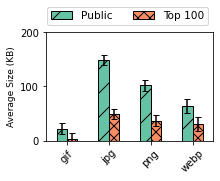

In [224]:
details_public = []
for country in countries:
  details_public.append(dfs[country]['details'][dfs[country]['details']["request_type"]=="Image"].copy())
  
df_det_public = pd.concat(details_public, axis=0)
print(df_det_public["bytesIn"].mean()/(1024))
details_top = []
for country in countries:
  details_top.append(dfs_top[country]['details'][dfs_top[country]['details']["request_type"]=="Image"].copy())
df_det_top = pd.concat(details_top, axis=0)
print(df_det_top["bytesIn"].mean()/(1024))
png = df_det_public[df_det_public["contentType"]=="image/png"]["bytesIn"]/(1024)
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = df_det_public[df_det_public["contentType"]=="image/webp"]["bytesIn"]/(1024)
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = df_det_public[df_det_public["contentType"]=="image/gif"]["bytesIn"]/(1024)
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = df_det_public[(df_det_public["contentType"]=="image/jpeg") | (df_det_public["contentType"]=="image/jpg") | (df_det_public["contentType"]=="image/pjpeg")]["bytesIn"]/(1024)
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_t = df_det_top[df_det_top["contentType"]=="image/png"]["bytesIn"]/(1024)
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = df_det_top[df_det_top["contentType"]=="image/webp"]["bytesIn"]/(1024)
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = df_det_top[df_det_top["contentType"]=="image/gif"]["bytesIn"]/(1024)
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = df_det_top[(df_det_top["contentType"]=="image/jpeg") | (df_det_top["contentType"]=="image/jpg") | (df_det_top["contentType"]=="image/pjpeg")]["bytesIn"]/(1024)
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average Size (MB)",rot=45, ylim=(0,200), figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
plt.yticks(fontsize=10)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Average Size (KB)", fontsize=9)

plt.savefig("graphs/format_bytes.png", bbox_inches = 'tight')
plt.savefig("graphs/format_bytes.eps", bbox_inches = 'tight')
(df_det_public[df_det_public["contentType"]=="image/png"]["bytesIn"]/(1024*1024)).mean()

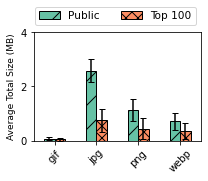

In [225]:

png_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").sum())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").sum())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").sum())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs[country]['details'][(dfs[country]['details']["contentType"]=="image/jpeg") | (dfs[country]['details']["contentType"]=="image/jpg") | (dfs[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").sum())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]

png = png_public["bytesIn"]/(1024*1024)
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = webp_public["bytesIn"]/(1024*1024)
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = gif_public["bytesIn"]/(1024*1024)
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = jpg_public["bytesIn"]/(1024*1024)
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").sum())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").sum())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").sum())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs_top[country]['details'][(dfs_top[country]['details']["contentType"]=="image/jpeg") | (dfs_top[country]['details']["contentType"]=="image/jpg") | (dfs_top[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").sum())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]


png_t = png_public["bytesIn"]/(1024*1024)
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = webp_public["bytesIn"]/(1024*1024)
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = gif_public["bytesIn"]/(1024*1024)
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = jpg_public["bytesIn"]/(1024*1024)
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Average Total Size (MB)",rot=45, ylim=(0,4), figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Average Total Size (MB)", fontsize=9)
plt.savefig("graphs/format_bytes_total.png", bbox_inches = 'tight')
plt.savefig("graphs/format_bytes_total.eps", bbox_inches = 'tight')

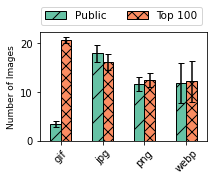

In [226]:

png_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").count())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").count())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs[country]['details'][dfs[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").count())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs[country]['details'][(dfs[country]['details']["contentType"]=="image/jpeg") | (dfs[country]['details']["contentType"]=="image/jpg") | (dfs[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").count())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]

png = png_public["bytesIn"]
png_mean = png.mean()
png_std = png.std()
png_err = 1.96 * png_std/np.sqrt(len(png))

webp = webp_public["bytesIn"]
webp_mean = webp.mean()
webp_std = webp.std()
webp_err = 1.96 * webp_std/np.sqrt(len(webp))

gif = gif_public["bytesIn"]
gif_mean = gif.mean()
gif_std = gif.std()
gif_err = 1.96 * gif_std/np.sqrt(len(gif))

jpg = jpg_public["bytesIn"]
jpg_mean = jpg.mean()
jpg_std = jpg.std()
jpg_err = 1.96 * jpg_std/np.sqrt(len(jpg))

public_errs = [gif_err, jpg_err, png_err, webp_err]

png_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/png"]
  png_data.append(all_img.groupby("id").count())
png_public = pd.concat(png_data, axis=0)
png_public["bytesIn"]

gif_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/gif"]
  gif_data.append(all_img.groupby("id").count())
gif_public = pd.concat(gif_data, axis=0)
gif_public["bytesIn"]

webp_data = []
for country in countries:
  all_img = dfs_top[country]['details'][dfs_top[country]['details']["contentType"]=="image/webp"]
  webp_data.append(all_img.groupby("id").count())
webp_public = pd.concat(webp_data, axis=0)
webp_public["bytesIn"]

jpg_data = []
for country in countries:
  all_img = dfs_top[country]['details'][(dfs_top[country]['details']["contentType"]=="image/jpeg") | (dfs_top[country]['details']["contentType"]=="image/jpg") | (dfs_top[country]['details']["contentType"]=="image/pjpeg")]
  jpg_data.append(all_img.groupby("id").count())
jpg_public = pd.concat(jpg_data, axis=0)
jpg_public["bytesIn"]


png_t = png_public["bytesIn"]
png_mean_t = png_t.mean()
png_std_t = png_t.std()
png_err_t = 1.96 * png_std_t/np.sqrt(len(png_t))

webp_t = webp_public["bytesIn"]
webp_mean_t = webp_t.mean()
webp_std_t = webp_t.std()
webp_err_t = 1.96 * webp_std_t/np.sqrt(len(webp_t))

gif_t = gif_public["bytesIn"]
gif_mean_t = gif_t.mean()
gif_std_t = gif_t.std()
gif_err_t = 1.96 * gif_std_t/np.sqrt(len(gif_t))

jpg_t = jpg_public["bytesIn"]
jpg_mean_t = jpg_t.mean()
jpg_std_t = jpg_t.std()
jpg_err_t = 1.96 * jpg_std_t/np.sqrt(len(jpg_t))

top_errs = [gif_err, jpg_err, png_err, webp_err]

to_plot = [[gif_mean, gif_mean_t], [jpg_mean, jpg_mean_t], [png_mean, png_mean_t], [webp_mean, webp_mean_t]]

type_bytes = pd.DataFrame(to_plot, columns=["Public", "Top 100"], index=["gif", "jpg", "png", "webp"])
ax = type_bytes.plot(kind="bar", yerr=[public_errs, top_errs], color=sns.color_palette("Set2"), capsize=3, edgecolor="black", ylabel="Number of Images",rot=45, figsize=(3,2))
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(type_bytes))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc="center right", ncol=2, bbox_to_anchor=(1, 1.15), prop=dict(size=10.5))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
ax.set_ylabel(ylabel="Number of Images", fontsize=9)
plt.savefig("graphs/format_reqs_total.png", bbox_inches = 'tight')
plt.savefig("graphs/format_reqs_total.eps", bbox_inches = 'tight')

'JPG' format takes up the most space in Images specifically in Public Sites

Aggregated

In [227]:
# # aggregated_imageFormat_Sizes=[0]*9
# # # image_format_public
# # # image_format_top
# # k=0
# # for image_p,image_t in zip(,):
# #   aggregated_imageFormat_Sizes[k]= round(image_p+image_t,2) 
# #   k=k+1

# # aggregated_imageFormat_Sizes
# aggregated_imageSizes=[0]*9

# k=0
# for image_p,image_t in zip(imagebytes_public,imagebytes_top):
#   aggregated_imageSizes[k]= round(image_p+image_t,2) 
#   k=k+1

# aggregated_imageSizes

In [228]:

# # fig=go.Figure(data=[
# #     go.Bar(x=countries, y=aggregated_imageFormat_Sizes,text=aggregated_imageFormat_Sizes)])
# # fig.update_layout( title="Image Sizes per Country (M Bytes)", 
# #                   title_x=0.5,
# #                    width=600,
# #                   height=600)
                  
# # fig.update_xaxes(title_text="Countries")
# # fig.update_yaxes(title_text="Sizes")
# # fig.update_yaxes(automargin=True)


# # fig.show()


# fig=go.Figure(data=[
#     go.Bar(x=countries, y=aggregated_imageSizes,text=aggregated_imageSizes)])
# fig.update_layout( title="Image Sizes (M Bytes) per Country", 
#                   title_x=0.5,
#                    width=600,
#                   height=600)
                  
# fig.update_xaxes(title_text="Countries")
# fig.update_yaxes(title_text="Image Sizes")
# fig.update_yaxes(automargin=True)


# fig.show()

In [229]:
# First find No. of Image Requests per Country 

image_requests_perCountryPublic =[0]*len(countries)
image_requests_perCountryTop =[0]*len(countries)

i=0
for country in countries:
  image_requests_perCountryPublic[i]=dfs[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  image_requests_perCountryTop[i]=dfs_top[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  i=i+1

print(image_requests_perCountryPublic)
print(image_requests_perCountryTop)



[1945, 2349, 2698, 2985, 2424, 2187, 3245, 3127, 1939]
[6954, 4449, 5045, 6125, 4335, 5747, 4694, 4384, 4499]


In [230]:

fig=go.Figure(data=[
    go.Bar(name="Public",x=countries, y=image_requests_perCountryPublic,text=image_requests_perCountryPublic),
    go.Bar(name="Top 100",x=countries, y=image_requests_perCountryTop,text=image_requests_perCountryTop)])
fig.update_layout( title="Image Requests per Country (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

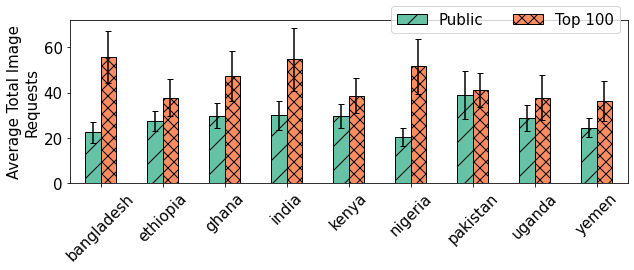

In [231]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["summary"]["requests.image"]
    temp2 = dfs_top[country]["summary"]["requests.image"]
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black")

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Total Image\nRequests")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/reqs_total_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/reqs_total_image_country.eps", bbox_inches = 'tight')

Ghana web pages contribute to the most Images Sizes; Its not clear whether Alot of images are being used or the size of Images contribute to this percentage (More analysis needs to be done)

To Check:

1.   Average number of images (An) used in each url (Total image Requests/Total urls of public & Top 100)
2.   Average sizes of images (Av) in each url (Total Image Size/Total urls of public & Top 100)
3.   Find Ratio Av/An --> This gives the average size of 1 image used in a url
4.  Compare results of countries


In [232]:
# First find No. of Image Requests per Country 

image_requests_perCountry =[0]*len(countries)

i=0
for country in countries:
  image_requests_perCountry[i]=dfs[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()+dfs_top[country]['details']['contentType'].str.contains("image/png|image/gif|image/jpeg|image/jpg|image/pjpeg|image/avif|svg+xml|x-icon|image/vnd.microsoft.icon|image/webp|image/bmp",na=False).sum()
  i=i+1

image_requests_perCountry


[8899, 6798, 7743, 9110, 6759, 7934, 7939, 7511, 6438]

In [233]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=image_requests_perCountry,text=image_requests_perCountry)])
fig.update_layout( title="Image Requests per Country (M Bytes)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="No. of Requests")
fig.update_yaxes(automargin=True)


fig.show()

In [234]:
print("Public Sites")
for country in countries:
  print(country+ ": "+str(dfs[country]['summary']['final_url'].count()))
print("\n Top 100")
for country in countries:
  print(country+ ": "+str(dfs_top[country]['summary']['final_url'].count()))


Public Sites
bangladesh: 86
ethiopia: 91
ghana: 92
india: 78
kenya: 86
nigeria: 112
pakistan: 98
uganda: 110
yemen: 85

 Top 100
bangladesh: 100
ethiopia: 100
ghana: 100
india: 100
kenya: 100
nigeria: 100
pakistan: 100
uganda: 100
yemen: 100


**Note: India and Ethiopia urls are alot less than Ghana in Public which can affect our analysis**

In [235]:
average_image_size=[0]*len(countries)

i=0
for country in countries:
  # av1=aggregated_imageSizes[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image sizes
  av1=aggregated_imageSizes[i]
  av2=image_requests_perCountry[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image requests
  average_image_size[i]=av1/av2 # gives average image size used
  i=i+1
average_image_size=[np.round(x,2) for x in average_image_size]
# average_image_size
average_image_size

[0.11, 0.13, 0.12, 0.09, 0.1, 0.08, 0.1, 0.1, 0.08]

In [236]:

fig=go.Figure(data=[
    go.Bar(x=countries, y=average_image_size,text=average_image_size)])
fig.update_layout( title="Average image size per Country", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

Average Image Size in Ghana isn't the highest, It's not the lowest either, but given the average Image requests with the average Image size (avg image requests * avg image size) , this might give the highest percentage of images in Ghana (further analysis needed)

In [237]:
products=[]

for num1, num2 in zip(image_requests_perCountry, average_image_size):
	products.append(round(num1 * num2,2))  
 
fig=go.Figure(data=[
    go.Bar(x=countries, y=products,text=products)])
fig.update_layout( title="Average Size of Total images used", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Average Total Image Size")
fig.update_yaxes(automargin=True)


fig.show()

### **Average (Individual) Image Size Public vs Top 100**

In [238]:
average_image_size_public=[0]*len(countries)
average_image_size_top=[0]*len(countries)

i=0
for country in countries:
  # av1=aggregated_imageSizes[i]/(dfs[country]['summary']['final_url'].count()+ dfs_top[country]['summary']['final_url'].count()) # avg image sizes
  av1_public=imagebytes_public[i]
  av1_top=imagebytes_top[i]
  av2_public=image_requests_perCountryPublic[i]/dfs[country]['summary']['final_url'].count()  # avg image requests
  av2_top=image_requests_perCountryTop[i]/dfs_top[country]['summary']['final_url'].count()
  average_image_size_public[i]=av1_public/av2_public # gives average image size used
  average_image_size_top[i]= av1_top/av2_top # gives average image size used
  i=i+1
  
average_image_size_public=[np.round(x,2) for x in average_image_size_public]
average_image_size_top=[np.round(x,2) for x in average_image_size_top]

print(average_image_size_public)
print(average_image_size_top)

[0.17, 0.14, 0.13, 0.1, 0.1, 0.11, 0.09, 0.08, 0.08]
[0.02, 0.02, 0.02, 0.01, 0.02, 0.02, 0.03, 0.03, 0.02]


In [239]:
print(np.mean(average_image_size_public))
print(np.mean(average_image_size_top))

0.1111111111111111
0.021111111111111112


In [240]:

fig=go.Figure(data=[
    go.Bar(name="Public", x=countries, y=average_image_size_public,text=average_image_size_public),
    go.Bar(name="Top 100",x=countries, y=average_image_size_top,text=average_image_size_top)])
fig.update_layout( title="Average image size per Country", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()

In [241]:
max_avg=[*map(max, zip(average_image_size_public, average_image_size_top))]
min_avg=[*map(min, zip(average_image_size_public, average_image_size_top))]

data = {'Country': countries,'Min Image Size':min_avg,'Max Image Size':max_avg}
df = pd.DataFrame(data)
print("Average Image Size per Url")
df


Average Image Size per Url


,Country,Min Image Size,Max Image Size
0,bangladesh,0.02,0.17
1,ethiopia,0.02,0.14
2,ghana,0.02,0.13
3,india,0.01,0.10
4,kenya,0.02,0.10
5,nigeria,0.02,0.11
6,pakistan,0.03,0.09
7,uganda,0.03,0.08
8,yemen,0.02,0.08


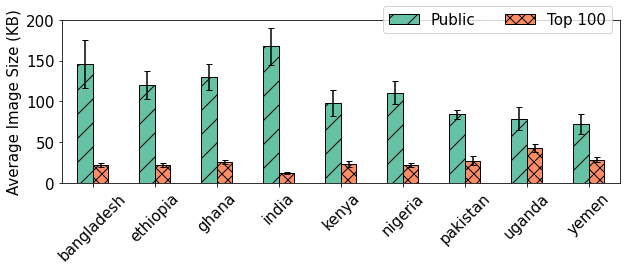

In [242]:
avg_reqs = []
errors = []
avg_reqs_t = []
errors_t = []
for country in countries:
    temp = dfs[country]["details"][dfs[country]["details"]["request_type"]=="Image"]["bytesIn"]/(1024)
    temp2 = dfs_top[country]["details"][dfs_top[country]["details"]["request_type"]=="Image"]["bytesIn"]/(1024)
    mean = temp.mean()
    sigma = temp.std()
    avg_reqs.append(mean)
    
    mean2 = temp2.mean()
    sigma2 = temp2.std()
    avg_reqs_t.append(mean2)
    
    
    errors.append(1.96*sigma/np.sqrt(len(temp)))
    errors_t.append(1.96*sigma2/np.sqrt(len(temp2)))

reqs_df = pd.DataFrame(zip(avg_reqs,avg_reqs_t), index=countries, columns=["Public","Top 100"])
reqs_df

palette = sns.color_palette("Set2")
ax = reqs_df.plot(kind="bar",  color=palette, yerr=[errors,errors_t], rot=45, capsize=3, figsize=(10,3), edgecolor="black", ylim=(0,200))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(reqs_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_ylabel("Average Image Size (KB)")
ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=2)
plt.savefig("graphs/bytes_per_image_country.png", bbox_inches = 'tight')
plt.savefig("graphs/bytes_per_image_country.eps", bbox_inches = 'tight')

In [243]:
np.mean(reqs_df)

Public     111.908170
Top 100     25.075634
dtype: float64

In [244]:
image_requests_public=0
image_requests_top=0
urls_public=0
urls_top=0
# average image requests per public sites
for country in countries:
  image_requests_public=image_requests_public+ dfs[country]['details']['contentType'].str.contains("image|svg+xml|x-icon",na=False).sum()
  urls_public= urls_public+ dfs[country]['summary']['final_url'].count()

# average image requests per Top 100 sites
for country in countries:
  image_requests_top=image_requests_top+ dfs_top[country]['details']['contentType'].str.contains("image|svg+xml|x-icon",na=False).sum()
  urls_top= urls_top+ dfs_top[country]['summary']['final_url'].count()

avg_public=round(image_requests_public/urls_public)
avg_top=round(image_requests_top/urls_top)

print(avg_public)
print(avg_top)


28
57


In [245]:
# Average image Sizes

avg_size_public=0
url_count_public=0

avg_size_top=0
url_count_top=0

for country in countries:
  avg_size_public=avg_size_public+(dfs[country]['summary']['bytes.image'].sum())/(1024*1024)
  url_count_public=url_count_public+dfs[country]['summary']['final_url'].count()

for country in countries:
  avg_size_top=avg_size_top+(dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024)
  url_count_top=url_count_top+dfs_top[country]['summary']['final_url'].count()

avg_imageSize_public= round((avg_size_public/url_count_public),2)
avg_imageSize_top= round((avg_size_top/url_count_top),2)

print(avg_imageSize_public)
print(avg_imageSize_top)

2.94
1.05


In [246]:
avg_public_perImage=[]
avg_top_perImage=[]
avg_public_perImage.append(round(avg_imageSize_public/avg_public,2))
avg_top_perImage.append(round(avg_imageSize_top/avg_top,2))

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'],y=avg_public_perImage,text=avg_public_perImage),
    go.Bar(name="Top 100",x=['Top 100'],y=avg_top_perImage,text=avg_top_perImage)])
fig.update_layout( title="Average Image Size (Public vs Top 100)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Public vs Top 100")
fig.update_yaxes(title_text="MBs")
fig.update_yaxes(automargin=True)


fig.show()



In [247]:
# Average Image Sizes per url


avg_imageSize_public=0
count=0
for country in countries:
    avg_imageSize_public=avg_imageSize_public+((dfs[country]['summary']['bytes.image'].sum())/(1024*1024))
    count=count+dfs[country]['summary']['final_url'].count()
    
avg_imageSize_public= round(avg_imageSize_public/count,2)
print(avg_imageSize_public)



avg_imageSize_top=0
count1=0
for country in countries:
    avg_imageSize_top=avg_imageSize_top+((dfs_top[country]['summary']['bytes.image'].sum())/(1024*1024))
    count1=count1+dfs_top[country]['summary']['final_url'].count()
    
avg_imageSize_top= round(avg_imageSize_top/count1,2)
print(avg_imageSize_top)



2.94
1.05


In [248]:
avg_imageSize_publicArray=[]
avg_imageSize_topArray=[]
avg_imageSize_publicArray.append(avg_imageSize_public)
avg_imageSize_topArray.append(avg_imageSize_top)

fig=go.Figure(data=[
    go.Bar(name="Public",x=['Public'],y=avg_imageSize_publicArray,text=avg_imageSize_publicArray),
    go.Bar(name="Top 100",x=['Top 100'],y=avg_imageSize_topArray,text=avg_imageSize_topArray)])
fig.update_layout( title="Average Image Sizes per url (Public vs Top 100)", 
                  title_x=0.5,
                   width=600,
                  height=600)
                  
# fig.update_xaxes(title_text="Public vs Top 100")
fig.update_yaxes(title_text="Average Image Sizes (M Bytes) per url")
fig.update_yaxes(automargin=True)


fig.show()



Average Image Size in Public Sites is 3x than Top 100 average image size

In [249]:
res_public = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_avg_public.csv")

res_public = res_public.set_index("country").drop("Unnamed: 0", axis=1)
res_public = res_public.loc[countries]

res_top = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_avg_top.csv")
res_top = res_top.set_index("country").drop("Unnamed: 0", axis=1)
res_top = res_top.loc[countries]

In [250]:
res_public

,avg_height,std_height,avg_pixels,std_pixels,avg_width,std_width,count
country,,,,,,,
bangladesh,472.815565,693.186281,1.034915e+06,3.569094e+06,723.313433,1056.483459,938
ethiopia,482.582418,614.855587,9.337251e+05,2.906088e+06,782.263736,1022.540778,1274
ghana,430.790175,504.576696,6.498875e+05,2.172676e+06,683.424561,780.545711,1425
india,342.786659,514.200471,5.586165e+05,2.330245e+06,569.841863,826.028300,1739
kenya,337.842960,376.682120,3.865525e+05,1.060141e+06,547.157040,641.667289,1108
nigeria,394.101774,454.987744,5.476030e+05,1.828082e+06,630.953315,722.690445,1071
pakistan,422.981132,421.718058,4.651213e+05,9.595506e+05,637.524417,607.779355,1802
uganda,311.839237,561.101230,5.537657e+05,2.769545e+06,472.228883,856.663377,734
yemen,383.467312,534.718724,6.298418e+05,3.236239e+06,589.258273,875.620487,1239


In [251]:
errs = []
heights = res_public.loc[:,["avg_height"]].rename({"avg_height": "Public"}, axis=1).merge(res_top.loc[:,["avg_height"]].rename({"avg_height": "Top 100"}, axis=1),left_index=True, right_index=True)
err = res_public.loc[:,["std_height", "count"]].rename({"std_height": "Public"}, axis=1)
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_height", "count"]].rename({"std_height": "Top 100"}, axis=1)
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

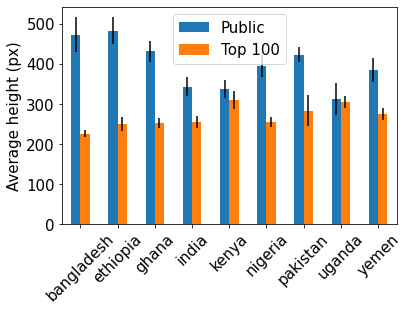

In [252]:
ax = heights.plot(kind="bar", rot=45,ylabel="Average height (px)", yerr=errs, xlabel="")
fig = ax.get_figure()
fig.savefig('graphs/height.png', bbox_inches = 'tight')
fig.savefig('graphs/height.eps', bbox_inches = 'tight')

In [253]:
errs = []
widths = res_public.loc[:,["avg_width"]].rename({"avg_width": "Public"}, axis=1).merge(res_top.loc[:,["avg_width"]].rename({"avg_width": "Top 100"}, axis=1),left_index=True, right_index=True)
err = res_public.loc[:,["std_width", "count"]].rename({"std_width": "Public"}, axis=1)
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_width", "count"]].rename({"std_width": "Top 100"}, axis=1)
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

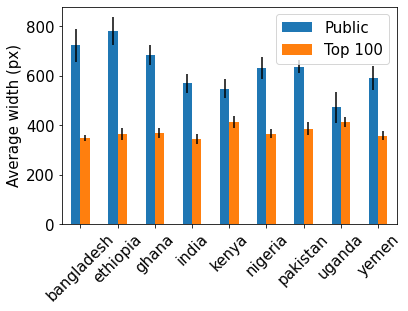

In [254]:
ax = widths.plot(kind="bar", rot=45,ylabel="Average width (px)", yerr=errs, xlabel="")
fig = ax.get_figure()
fig.savefig('graphs/width.png', bbox_inches = 'tight')
fig.savefig('graphs/width.eps', bbox_inches = 'tight')

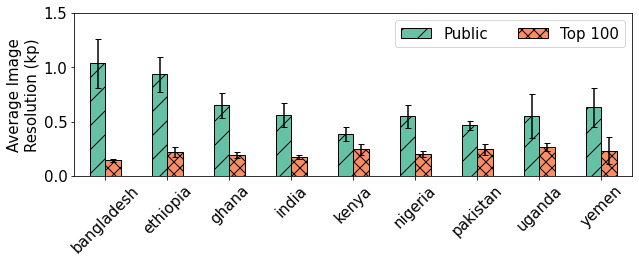

In [255]:
errs = []
pixels = res_public.loc[:,["avg_pixels"]].rename({"avg_pixels": "Public"}, axis=1).merge(res_top.loc[:,["avg_pixels"]].rename({"avg_pixels": "Top 100"}, axis=1),left_index=True, right_index=True)
pixels = pixels/1000000 # kpixels sqaure
err = res_public.loc[:,["std_pixels", "count"]].rename({"std_pixels": "Public"}, axis=1)
err["Public"] = err["Public"]/1000000
err["Public"] = 1.96  * err["Public"]/np.sqrt(err["count"])
err.drop("count", axis=1, inplace=True)
err2 = res_top.loc[:,["std_pixels", "count"]].rename({"std_pixels": "Top 100"}, axis=1)
err2["Top 100"] = err2["Top 100"]/1000000
err2["Top 100"] = 1.96  * err2["Top 100"]/np.sqrt(err2["count"])
err2.drop("count", axis=1, inplace=True)
errs.append(list(err["Public"]))
errs.append(list(err2["Top 100"]))

ax = pixels.plot(kind="bar", rot=45,ylim=(0,1.5),ylabel="Average Image\nResolution (kp)",yerr=errs,  xlabel="", figsize=(10,3), edgecolor="black", capsize=3, color=sns.color_palette("Set2"))

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(pixels))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(ncol=2)
fig = ax.get_figure()
fig.savefig('graphs/pixels.png', bbox_inches = 'tight')
fig.savefig('graphs/pixels.eps', bbox_inches = 'tight')

In [256]:
err2

,Top 100
country,
bangladesh,0.012276
ethiopia,0.044608
ghana,0.025346
india,0.021142
kenya,0.047024
nigeria,0.026056
pakistan,0.047696
uganda,0.036801
yemen,0.123514


In [257]:
diff = pixels["Public"] - pixels["Top 100"]
diff.mean() 

0.4264904804657681

In [258]:
(pixels["Public"]/pixels["Top 100"]).mean()

3.2288933720128923

In [259]:
pixels["Public"].mean()

0.6400032060823277

In [260]:
jquery_public = []
jquery_top = []
jquery = []
public_frameworks = []
top_frameworks = []
frameworks = ['angular', 'jquery', 'node', 'react', 'vue']
for country in countries:
  details = dfs[country]["details"]
  script_details = details[details["request_type"]=="Script"]
  total_scripts = len(script_details)
  jquery_count = 0
  vue_count = 0
  react_count = 0
  node_count = 0
  angular_count = 0
  for i, row in script_details.iterrows():
    if "angular" in row["url"]:
      angular_count+=1
    if "jquery" in row["url"]:
      jquery_count+=1
    if "node" in row["url"]:
      node_count+=1
    if "react" in row["url"]:
      react_count+=1
    if "vue" in row["url"]:
      vue_count+=1
   

  details_top = dfs_top[country]["details"]
  script_details_top = details_top[details_top["request_type"]=="Script"]
  total_scripts_top = len(script_details_top)
  jquery_count_top = 0
  vue_count_top = 0
  react_count_top = 0
  node_count_top = 0
  angular_count_top = 0
  for i, row in script_details_top.iterrows():
    if "angular" in row["url"]:
      angular_count_top+=1
    if "jquery" in row["url"]:
      jquery_count_top+=1
    if "node" in row["url"]:
      node_count_top+=1
    if "react" in row["url"]:
      react_count_top+=1
    if "vue" in row["url"]:
      vue_count_top+=1
  jquery.append([jquery_count*100/total_scripts, jquery_count_top*100/total_scripts_top])

  public_temp = [angular_count, jquery_count, node_count, react_count ,vue_count ]
  public_temp = [p/total_scripts*100 for p in public_temp]
  public_frameworks.append(public_temp)

  top_temp = [angular_count_top, jquery_count_top, node_count_top, react_count_top ,vue_count_top]
  top_temp = [p/total_scripts_top*100 for p in top_temp]
  top_frameworks.append(top_temp)
  # print(total_scripts, jquery_count)

public_frameworks


[[3.2134659525631215, 17.82708492731446, 0.0, 0.22953328232593728, 0.0],
 [0.0, 16.283452695062195, 1.4323407463249151, 0.11307953260459858, 0.0],
 [0.2727981293842557,
  21.706936866718628,
  0.03897116134060795,
  0.0,
  0.03897116134060795],
 [0.24311183144246357,
  21.39384116693679,
  0.08103727714748785,
  0.08103727714748785,
  0.0],
 [0.0, 20.319634703196346, 0.0, 0.1902587519025875, 0.0],
 [0.0, 21.72812725958062, 0.036153289949385395, 0.0, 0.036153289949385395],
 [0.0, 20.068317677198973, 0.0, 0.08539709649871904, 0.0],
 [0.0, 24.01877133105802, 0.0, 0.08532423208191127, 0.0],
 [0.13568521031207598, 23.134328358208954, 0.0, 0.0, 0.0]]

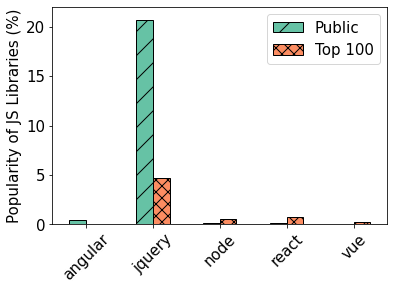

In [261]:
pub_frame = pd.DataFrame(public_frameworks, columns=frameworks, index=countries).mean().to_frame().rename({0:"Public"}, axis=1)
top_frame= pd.DataFrame(top_frameworks, columns=frameworks, index=countries).mean().to_frame().rename({0:"Top 100"}, axis=1)
frame = pub_frame.merge(top_frame, right_index= True, left_index=True)
ax = frame.plot(kind="bar", rot=45,ylabel="Popularity of JS Libraries (%)", color=sns.color_palette("Set2"), ylim=(0,22), edgecolor="black")


bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(frame))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()

fig = ax.get_figure()
fig.savefig('graphs/js_frameworks.png', bbox_inches = 'tight')
fig.savefig('graphs/js_frameworks.eps', bbox_inches = 'tight')

In [262]:
jquery_df = pd.DataFrame(jquery, columns=["Public", "Top 100"], index=countries)

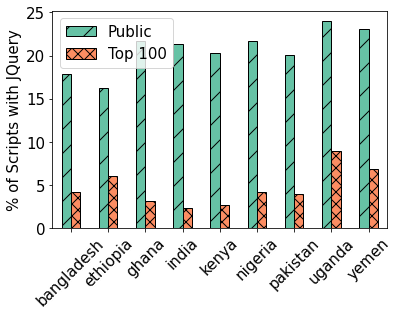

In [263]:
ax = jquery_df.plot(kind="bar", rot=45,ylabel="% of Scripts with JQuery", color=sns.color_palette("Set2"), edgecolor="black")

bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()

fig = ax.get_figure()
fig.savefig('graphs/jqeury.png', bbox_inches = 'tight')
fig.savefig('graphs/jquery.eps', bbox_inches = 'tight')

In [264]:
price_baskets = pd.read_excel("/content/drive/MyDrive/ACM_data/ITU_ICTPriceBaskets_2008-2021.xlsx", sheet_name="ICT Price Baskets 2008-2021")
price_baskets = price_baskets[price_baskets["Unit"]=="GNIpc"]
basket_countries = [x.capitalize() for x in countries]
dataonly =[]
data_voice_low = []
data_voice_high = []
year = 2020  # chose 2020 as yemen data not available for 2021
for country in basket_countries:
  country_data = price_baskets[price_baskets["Economy"]==country]
  dataonly.append(country_data[country_data["basket_combined_simplified"]=="Data-only mobile-broadband basket"][year].iloc[0])
  print(country + ":", country_data[country_data["basket_combined_simplified"]=="Data-only mobile-broadband basket"][year].iloc[0])
  # data_voice_low = []
  data_voice_low.append(country_data[country_data["basket_combined_simplified"]=="Mobile data and voice low-consumption basket"][year].iloc[0])
  # data_voice_high = []
  data_voice_high.append(country_data[country_data["basket_combined_simplified"]=="Mobile data and voice high-consumption basket"][year].iloc[0])

dataonly, data_voice_low, data_voice_high

# country_data[country_data["basket_combined_simplified"]=="Mobile-cellular low-usage basket"][2021]


Bangladesh: 1.9
Ethiopia: 9.52
Ghana: 2.03
India: 1.62
Kenya: 3.31
Nigeria: 1.71
Pakistan: 0.51
Uganda: 8.49
Yemen: 10.06


([1.9, 9.52, 2.03, 1.62, 3.31, 1.71, 0.51, 8.49, 10.06],
 [1.3, 5.9, 1.92, 1.62, 4.75, 3.42, 1.96, 21.24, 4.78],
 [2.52, 13.21, 4.19, 1.62, 7.12, 3.53, 1.96, 25.48, 10.82])

In [265]:
PAW_dfs = {}
PAW_dfs["Data only"] = page_size_df.copy()
PAW_dfs["Data low"] = page_size_df.copy()
PAW_dfs["Data high"] = page_size_df.copy()

In [266]:
types = ["Public", "Top 100"]
i = 0
for country in countries:
  for t in types:
    PAW_dfs["Data only"].loc[country, t] = PAW_dfs["Data only"].loc[country, t]/2.15 * (dataonly[i]/2)
    PAW_dfs["Data low"].loc[country, t] = PAW_dfs["Data low"].loc[country, t]/2.15 * (data_voice_low[i]/2)
    PAW_dfs["Data high"].loc[country, t] = PAW_dfs["Data high"].loc[country, t]/2.15 * (data_voice_high[i]/2)
  i+=1

In [267]:
PAW_dfs["Data only"]

,Public,Top 100
bangladesh,3.078473,1.300354
ethiopia,12.229258,4.353869
ghana,2.869665,1.137799
india,1.802163,0.715967
kenya,3.562414,1.820943
nigeria,1.428332,1.069615
pakistan,0.532929,0.286156
uganda,6.634736,5.209419
yemen,7.284961,4.446880


In [268]:
PAW_dfs["Data low"]

,Public,Top 100
bangladesh,2.106323,0.889716
ethiopia,7.579057,2.698301
ghana,2.714166,1.076145
india,1.802163,0.715967
kenya,5.112225,2.613136
nigeria,2.856664,2.139230
pakistan,2.048120,1.099737
uganda,16.598562,13.032752
yemen,3.461443,2.112931


In [269]:
PAW_dfs["Data high"]

,Public,Top 100
bangladesh,4.083027,1.724681
ethiopia,16.969379,6.041451
ghana,5.923103,2.348462
india,1.802163,0.715967
kenya,7.662956,3.916954
nigeria,2.948545,2.208036
pakistan,2.048120,1.099737
uganda,19.912022,15.634393
yemen,7.835316,4.782827


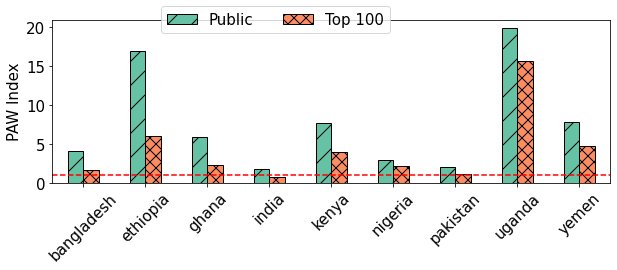

In [270]:
# High data
ax = PAW_dfs["Data high"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_highd.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_highd.eps", bbox_inches = 'tight')

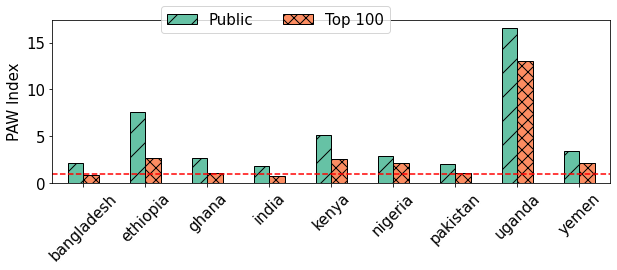

In [271]:
ax = PAW_dfs["Data low"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_lowd.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_lowd.eps", bbox_inches = 'tight')

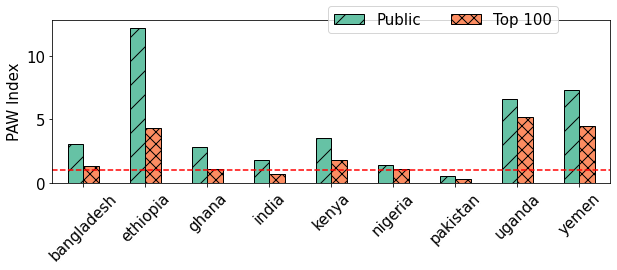

In [272]:
ax = PAW_dfs["Data only"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
ax.legend(loc='center', bbox_to_anchor=(0.7,1), ncol=2)
plt.savefig("graphs/paw_only.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_only.eps", bbox_inches = 'tight')

In [273]:
res_75 = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_75.csv")

res_75 = res_75.set_index("Unnamed: 0")

res_50 = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_50.csv")
res_50 = res_50.set_index("Unnamed: 0")
new_size_50 = 1 -((res_50["Original"]-res_50["Reduced"])/res_50["Original"])
new_size_50

new_size_75 = 1 -((res_75["Original"]-res_75["Reduced"])/res_75["Original"])
new_size_75

Unnamed: 0
bangladesh    0.504647
ethiopia      0.596498
ghana         0.633931
india         0.521957
kenya         0.690964
nigeria       0.678204
pakistan      0.597985
uganda        0.513837
yemen         0.631109
dtype: float64

In [274]:
new_bytes = []
for country in countries:
  total_bytes = (dfs[country]["summary"]["bytesIn"].mean()/(1024*1024)) - (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024))
  # print((dfs[country]["summary"]["bytesIn"].mean()/(1024*1024)), total_bytes, (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024)))
  new_im = (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024)) * new_size_50.loc[country]
  total_bytes = total_bytes + new_im
  # print(total_bytes)
  new_bytes.append(total_bytes)
new_sizes_df = pd.DataFrame(new_bytes, index=countries, columns=["MB"])
new_sizes_df

,MB
bangladesh,4.589054
ethiopia,3.688055
ghana,4.226688
india,2.605970
kenya,3.504700
nigeria,2.749368
pakistan,2.965413
uganda,1.999473
yemen,2.238490


In [275]:
for country in countries:
  print(dfs[country]["summary"]["bytesIn"].mean()/(1024*1024)) 

6.967069770014564
5.523719274080717
6.078601733497951
4.78351808205629
4.627908950628236
3.5917124833379472
4.493323948918556
3.360349160974676
3.1138503018547508


In [276]:
newPAW_dfs = {}
newPAW_dfs["Data only"] = new_sizes_df.copy()
newPAW_dfs["Data low"] = new_sizes_df.copy()
newPAW_dfs["Data high"] = new_sizes_df.copy()



In [277]:
types = ["MB"]
i = 0
for country in countries:
  for t in types:
    newPAW_dfs["Data only"].loc[country, t] = newPAW_dfs["Data only"].loc[country, t]/2.15 * (dataonly[i]/2)
    newPAW_dfs["Data low"].loc[country, t] = newPAW_dfs["Data low"].loc[country, t]/2.15 * (data_voice_low[i]/2)
    newPAW_dfs["Data high"].loc[country, t] = newPAW_dfs["Data high"].loc[country, t]/2.15 * (data_voice_high[i]/2)
  i+=1

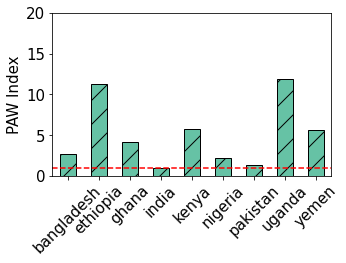

In [278]:
# High data
ax = newPAW_dfs["Data high"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_highd_new.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_highd_new.eps", bbox_inches = 'tight')

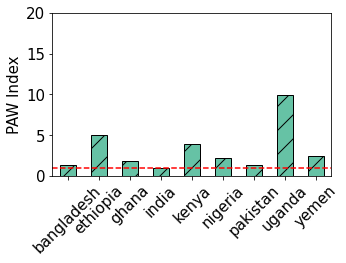

In [279]:
ax = newPAW_dfs["Data low"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_lowd_new.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_lowd_new.eps", bbox_inches = 'tight')

In [280]:
data_paw_improved_res =PAW_dfs["Data only"]["Public"].to_frame().merge(newPAW_dfs["Data only"], left_index=True, right_index=True).rename({"MB": "50% Resolution", "Public": "Before"}, axis=1)
data_paw_improved_res

,Before,50% Resolution
bangladesh,3.078473,2.027722
ethiopia,12.229258,8.165183
ghana,2.869665,1.995390
india,1.802163,0.981784
kenya,3.562414,2.697804
nigeria,1.428332,1.093353
pakistan,0.532929,0.351712
uganda,6.634736,3.947796
yemen,7.284961,5.237026


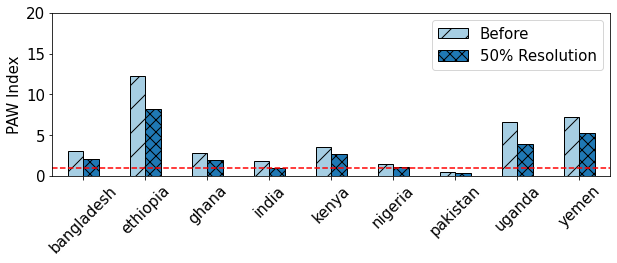

In [281]:
# ax = newPAW_dfs["Data only"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
ax = data_paw_improved_res.plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Paired"),edgecolor="black", legend=False, ylim=(0,20), figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.7,1), ncol=2)
plt.savefig("graphs/paw_only_new.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_only_new.eps", bbox_inches = 'tight')

In [282]:
res_webp = pd.read_csv("/content/drive/MyDrive/ACM_data/resolution_webp.csv")
res_webp = res_webp.set_index("Unnamed: 0")
new_size_webp = 1 -((res_webp["Original"]-res_webp["Reduced"])/res_webp["Original"])
new_size_webp

new_bytes = []
for country in countries:
  total_bytes = (dfs[country]["summary"]["bytesIn"].mean()/(1024*1024)) - (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024))
  # print((dfs[country]["summary"]["bytesIn"].mean()/(1024*1024)), total_bytes, (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024)))
  new_im = (dfs[country]["summary"]["bytes.image"].mean()/(1024*1024)) * new_size_webp.loc[country]
  total_bytes = total_bytes + new_im
  # print(total_bytes)
  new_bytes.append(total_bytes)
new_sizes_df = pd.DataFrame(new_bytes, index=countries, columns=["MB"])
new_sizes_df

,MB
bangladesh,3.732619
ethiopia,2.678345
ghana,2.979383
india,1.778515
kenya,2.240190
nigeria,1.829741
pakistan,2.301927
uganda,1.527794
yemen,1.697489


In [283]:
((res_webp["Original"]-res_webp["Reduced"])/res_webp["Original"]*100).mean()

80.9509590519391

In [284]:
newPAW_dfs = {}
newPAW_dfs["Data only"] = new_sizes_df.copy()
newPAW_dfs["Data low"] = new_sizes_df.copy()
newPAW_dfs["Data high"] = new_sizes_df.copy()
types = ["MB"]
i = 0
for country in countries:
  for t in types:
    newPAW_dfs["Data only"].loc[country, t] = newPAW_dfs["Data only"].loc[country, t]/2.15 * (dataonly[i]/2)
    newPAW_dfs["Data low"].loc[country, t] = newPAW_dfs["Data low"].loc[country, t]/2.15 * (data_voice_low[i]/2)
    newPAW_dfs["Data high"].loc[country, t] = newPAW_dfs["Data high"].loc[country, t]/2.15 * (data_voice_high[i]/2)
  i+=1

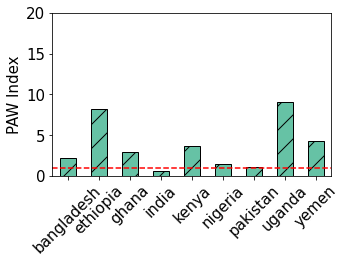

In [285]:
# High data
ax = newPAW_dfs["Data high"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_highd_webp.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_highd_webp.eps", bbox_inches = 'tight')

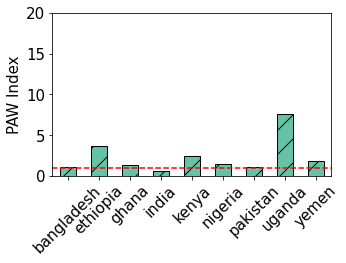

In [286]:
ax = newPAW_dfs["Data low"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.4,1), ncol=2)
plt.savefig("graphs/paw_lowd_webp.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_lowd_webp.eps", bbox_inches = 'tight')

In [287]:
data_paw_improved =PAW_dfs["Data only"]["Public"].to_frame().merge(newPAW_dfs["Data only"], left_index=True, right_index=True).rename({"MB": "WebP", "Public": "Before"}, axis=1)
data_paw_improved_overall = data_paw_improved_res.merge(data_paw_improved["WebP"],left_index=True, right_index=True)

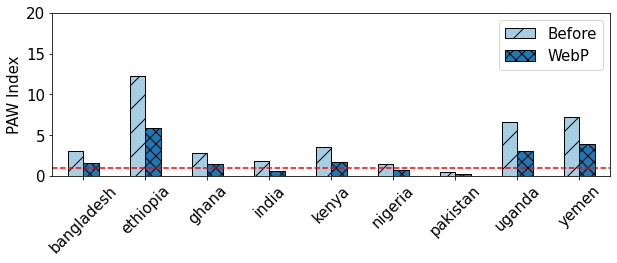

In [288]:
# ax = newPAW_dfs["Data only"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
ax = data_paw_improved.plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Paired"),edgecolor="black", legend=False, ylim=(0,20), figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.7,1), ncol=2)
plt.savefig("graphs/paw_only_webp.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_only_webp.eps", bbox_inches = 'tight')

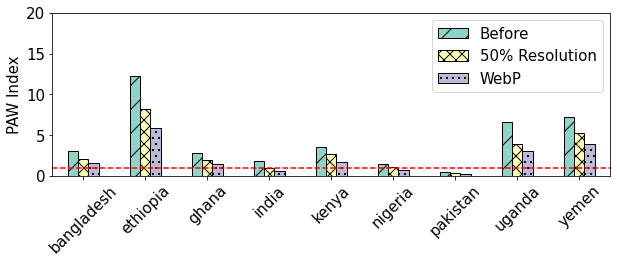

In [289]:
# ax = newPAW_dfs["Data only"].plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set2"),edgecolor="black", legend=False, ylim=(0,20), figsize=(5,3))
ax = data_paw_improved_overall.plot(kind="bar",rot=45, ylabel="PAW Index",color=sns.color_palette("Set3"),edgecolor="black", legend=False, ylim=(0,20), figsize=(10,3))
plt.axhline(y=1, color='r', linestyle='--' )
bars = ax.patches
patterns = ["/", "xx", ".."]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
# ax.legend(loc='center', bbox_to_anchor=(0.7,1), ncol=2)
plt.savefig("graphs/paw_improved.png", bbox_inches = 'tight')
plt.savefig("graphs/paw_improved.eps", bbox_inches = 'tight')

In [290]:
incomes = pd.read_csv("/content/drive/MyDrive/ACM_data/median_income.csv", index_col=0)
incomes.index = incomes.index.str.lower()

In [291]:
price_baskets_USD = pd.read_excel("/content/drive/MyDrive/ACM_data/ITU_ICTPriceBaskets_2008-2021.xlsx", sheet_name="ICT Price Baskets 2008-2021")
price_baskets_USD = price_baskets_USD[price_baskets_USD["Unit"]=="USD"]
basket_countries = [x.capitalize() for x in countries]
data_USD=[]
year = 2020  # chose 2020 as yemen data not available for 2021
for country in basket_countries:
  country_data = price_baskets_USD[price_baskets_USD["Economy"]==country]
  data_USD.append(country_data[country_data["basket_combined_simplified"]=="Mobile data and voice low-consumption basket"][year].iloc[0])
data_USD

[2.08, 3.45, 3.22, 2.65, 6.71, 5.4, 1.85, 13.4, 7.59]

In [292]:
size_income = []
for country,data in zip(countries, data_USD):
  # print(incomes.loc[country, "medianIncome"])
  size_income.append([country, incomes.loc[country, "medianIncome"], page_size_df.loc[country, "Public"],page_size_df.loc[country, "Top 100"], data])

size_income_df = pd.DataFrame(size_income, columns=["country", "median income ($/year)", "public page size (MB)","top page size (MB)", "cost of 500MB plan ($)"]).set_index("country")

size_income_df["cost of one public page ($)"] = (size_income_df["cost of 500MB plan ($)"]*size_income_df["public page size (MB)"])/500
size_income_df["Public"] = (size_income_df["median income ($/year)"]/size_income_df["cost of one public page ($)"])/12

size_income_df["cost of one top page ($)"] = (size_income_df["cost of 500MB plan ($)"]*size_income_df["top page size (MB)"])/500
size_income_df["Top 100"] = (size_income_df["median income ($/year)"]/size_income_df["cost of one top page ($)"])/12
size_income_df

,median income ($/year),public page size (MB),top page size (MB),cost of 500MB plan ($),cost of one public page ($),Public,cost of one top page ($),Top 100
country,,,,,,,,
bangladesh,1131,6.967070,2.942907,2.08,0.028983,3251.905141,0.012242,7698.594453
ethiopia,907,5.523719,1.966559,3.45,0.038114,1983.103365,0.013569,5570.190763
ghana,1779,6.078602,2.410117,3.22,0.039146,3787.085804,0.015521,9551.482549
india,648,4.783518,1.900405,2.65,0.025353,2129.955207,0.010072,5361.319182
kenya,874,4.627909,2.365576,6.71,0.062107,1172.716038,0.031746,2294.250206
nigeria,825,3.591712,2.689676,5.40,0.038790,1772.341403,0.029048,2366.731705
pakistan,1399,4.493324,2.412688,1.85,0.016625,7012.405375,0.008927,13059.709928
uganda,804,3.360349,2.638457,13.40,0.090057,743.970308,0.070711,947.523406
yemen,1150,3.113850,1.900754,7.59,0.047268,2027.435715,0.028853,3321.382770


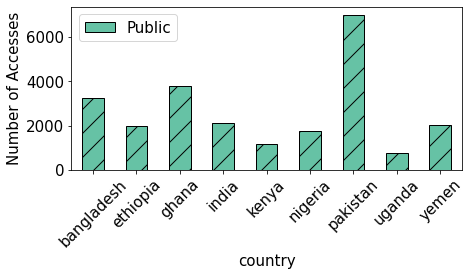

In [293]:
ax = size_income_df[["Public"]].plot(kind="bar",ylabel="Number of Accesses",rot=45,figsize=(7,3), color=sns.color_palette("Set2"), edgecolor="black")
bars = ax.patches
patterns = ["/", "xx"]
hatches = [h for h in patterns for _ in range(len(jquery_df))]

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

In [294]:
!zip -r /content/graphs.zip /content/graphs

updating: content/graphs/ (stored 0%)
updating: content/graphs/pixels.png (deflated 8%)
updating: content/graphs/reqs_country.eps (deflated 73%)
updating: content/graphs/total_image_reqs.eps (deflated 73%)
updating: content/graphs/reqs_country.png (deflated 8%)
updating: content/graphs/paw_lowd_new.eps (deflated 70%)
updating: content/graphs/bytes_per_image_country.png (deflated 8%)
updating: content/graphs/paw_highd_webp.eps (deflated 70%)
updating: content/graphs/page_size.eps (deflated 73%)
updating: content/graphs/type_bytes.eps (deflated 70%)
updating: content/graphs/format_bytes.eps (deflated 69%)
updating: content/graphs/type_reqs.png (deflated 5%)
updating: content/graphs/paw_improved.eps (deflated 79%)
updating: content/graphs/paw_highd.eps (deflated 73%)
updating: content/graphs/paw_lowd.eps (deflated 73%)
updating: content/graphs/perc_bytes.eps (deflated 71%)
updating: content/graphs/page_size.png (deflated 7%)
updating: content/graphs/paw_only.png (deflated 7%)
updating: co